In [ ]:
# === SSC bootstrap cell (no borrar) ===
import os, sys, pathlib
BASE = "/content/drive/MyDrive/SSC"
os.environ["SSC_ROOT"] = BASE
os.environ["SSC_CACHE_DIR"] = f"{BASE}/.ssc_cache"
pathlib.Path(os.environ["SSC_CACHE_DIR"]).mkdir(parents=True, exist_ok=True)
sys.path.insert(0, BASE)

from ssc_pipeline.ssc_pipeline import run as ssc_update
ssc_update()  # refresca /content/drive/MyDrive/SSC/main.csv

import pandas as pd
df = pd.read_csv(f"{BASE}/main.csv")
print("main.csv cargado desde:", f"{BASE}/main.csv", "| Filas:", len(df))
df.head(3)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from scipy.stats import norm
import ipywidgets as widgets
from ipywidgets import interact

import os
import time

from google.colab import drive

# Import Data

In [3]:
# Mount Google Drive
drive.mount('/content/drive')

# Define the path inside Google Drive
base_dir = "/content/drive/My Drive/Winter Quarter 2025/STA 141C - Final Project/"
data_dir = base_dir + "Data/"

Mounted at /content/drive


In [5]:
impexp_dir = os.path.join(data_dir, "USImpExp")
impexp_data = {}

for year in range(2000, 2023):
  impexp_data[year] = pd.read_csv(os.path.join(impexp_dir, f"{year}.csv"))
  print(f"Successfully loaded data for {year}.")

Successfully loaded data for 2000.
Successfully loaded data for 2001.
Successfully loaded data for 2002.
Successfully loaded data for 2003.
Successfully loaded data for 2004.
Successfully loaded data for 2005.
Successfully loaded data for 2006.
Successfully loaded data for 2007.
Successfully loaded data for 2008.
Successfully loaded data for 2009.
Successfully loaded data for 2010.
Successfully loaded data for 2011.
Successfully loaded data for 2012.
Successfully loaded data for 2013.
Successfully loaded data for 2014.
Successfully loaded data for 2015.
Successfully loaded data for 2016.
Successfully loaded data for 2017.
Successfully loaded data for 2018.
Successfully loaded data for 2019.
Successfully loaded data for 2020.
Successfully loaded data for 2021.
Successfully loaded data for 2022.


In [31]:
main_df = pd.read_csv(os.path.join(data_dir, "main.csv"))
main_df

,Product Group,Export (US$ Thousand),Import (US$ Thousand),Export Product Share (%),Import Product Share (%),Revealed comparative advantage,World Growth (%),Country Growth (%),AHS Simple Average (%),AHS Weighted Average (%),...,MFN Duty Free Tariff Lines Share (%),MFN Specific Tariff Lines Share (%),MFN AVE Tariff Lines Share (%),MFN MaxRate (%),MFN MinRate (%),MFN SpecificDuty Imports (US$ Thousand),MFN Dutiable Imports (US$ Thousand),MFN Duty Free Imports (US$ Thousand),Country,Year
0,All Products,16184679.30,1.000129e+08,100.00,100.00,1.00,16.55,7.15,4.24,4.11,...,30.50,2.04,8.06,350.00,0.0,1501148.82,62928834.48,43538381.04,China,2000
1,Capital goods,8304745.38,2.613660e+07,51.31,26.13,1.27,15.75,6.70,1.48,0.79,...,54.80,0.27,0.60,25.00,0.0,19163.62,10335499.23,17008951.99,China,2000
2,Consumer goods,1325146.86,6.414185e+07,8.19,64.13,0.73,22.41,10.64,5.29,5.55,...,22.77,3.81,9.40,247.47,0.0,943810.83,47858993.09,21810579.77,China,2000
3,Intermediate goods,3233539.85,7.023412e+06,19.98,7.02,0.74,11.13,-0.61,5.21,3.51,...,22.69,1.27,7.95,350.00,0.0,95138.13,3909747.78,3815256.07,China,2000
4,Raw materials,2483821.28,1.574956e+06,15.35,1.57,1.04,42.98,30.99,1.91,1.25,...,54.35,0.99,22.33,350.00,0.0,443036.24,824594.38,903593.21,China,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2410,Stone and Glass,2682233.32,9.364003e+06,0.83,2.04,0.87,7.56,5.90,0.00,0.00,...,33.72,0.00,1.45,38.00,0.0,0.00,7543711.97,1452397.26,Mexico,2022
2411,Textiles and Clothing,6424058.89,5.680268e+06,1.98,1.24,0.60,10.06,3.87,0.00,0.00,...,12.56,0.00,4.11,32.00,0.0,0.00,5331392.26,144592.42,Mexico,2022
2412,Transportation,24459899.41,1.139018e+08,7.54,24.81,1.02,11.06,8.73,0.00,0.00,...,46.08,0.00,0.00,25.00,0.0,0.00,93808285.22,3814814.58,Mexico,2022
2413,Vegetable,14308950.99,2.104386e+07,4.41,4.58,1.53,7.20,4.33,0.00,0.00,...,23.76,0.00,41.68,131.80,0.0,0.00,19054722.73,1486948.45,Mexico,2022


# Identify Top Trade Partners

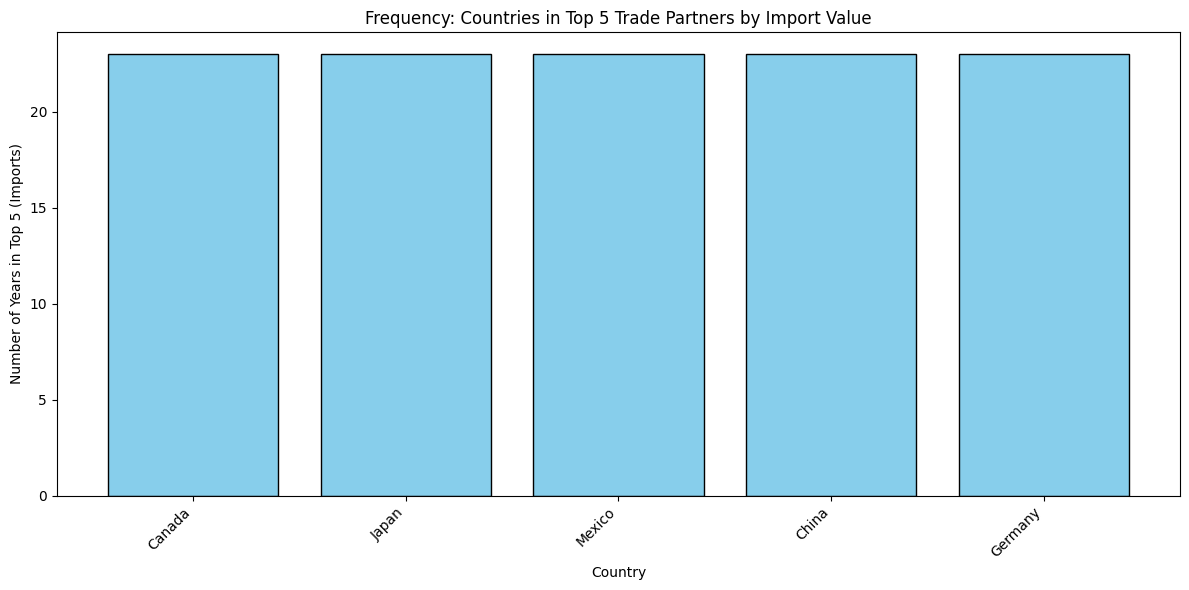

In [9]:
import matplotlib.pyplot as plt

# Dictionary to store frequency counts for top 5 by import value
top5_import_counts = {}

# Loop through each year's dataframe in the dictionary
for year, df in impexp_data.items():
    # Sort by import value and select the top 5 trade partners
    df_top5_import = df.sort_values('Import (US$ Thousand)', ascending=False).head(5)
    for partner in df_top5_import['Partner Name']:
        top5_import_counts[partner] = top5_import_counts.get(partner, 0) + 1

# Create a bar chart with country names on the x-axis and frequency counts on the y-axis
plt.figure(figsize=(12, 6))
countries = list(top5_import_counts.keys())
frequencies = list(top5_import_counts.values())

plt.bar(countries, frequencies, color='skyblue', edgecolor='black')
plt.xlabel('Country')
plt.ylabel('Number of Years in Top 5 (Imports)')
plt.title('Frequency: Countries in Top 5 Trade Partners by Import Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


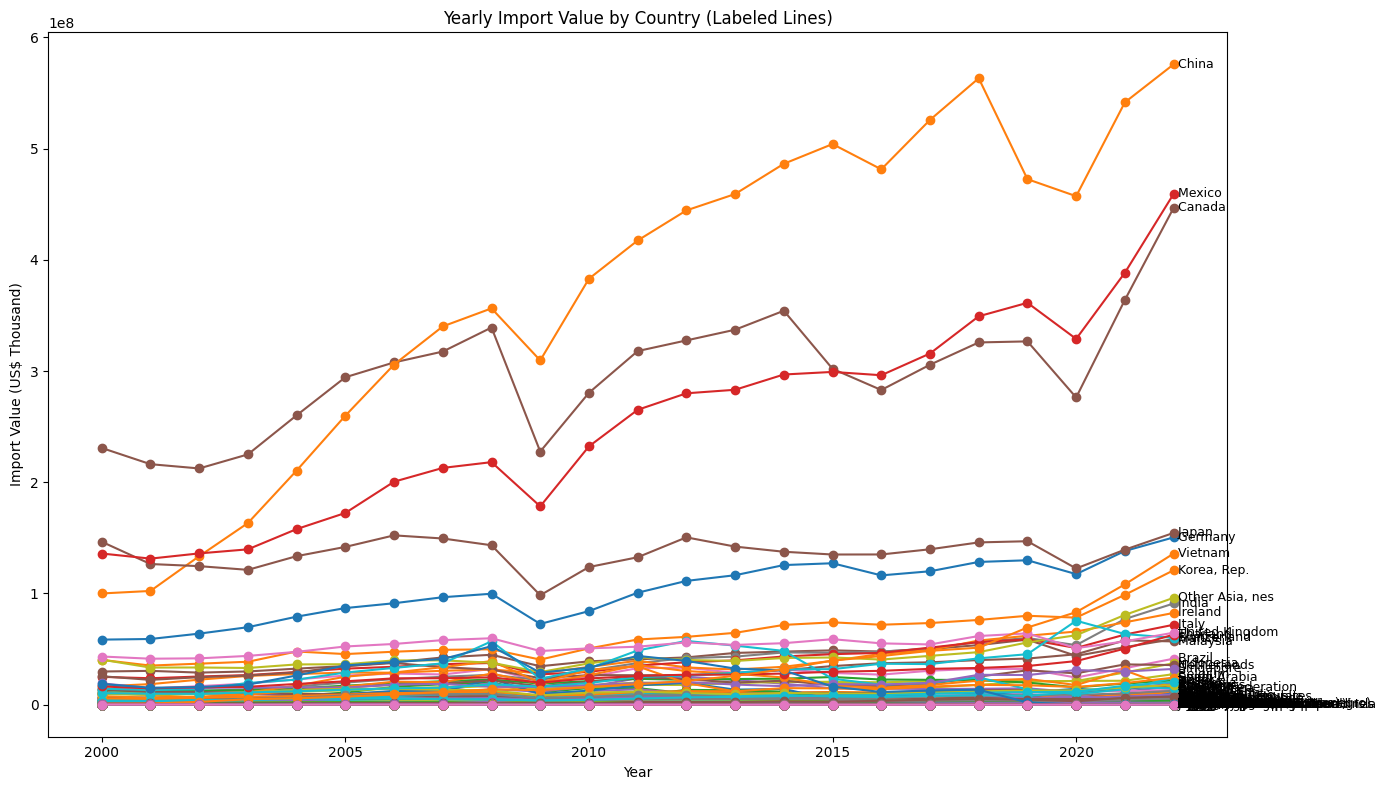

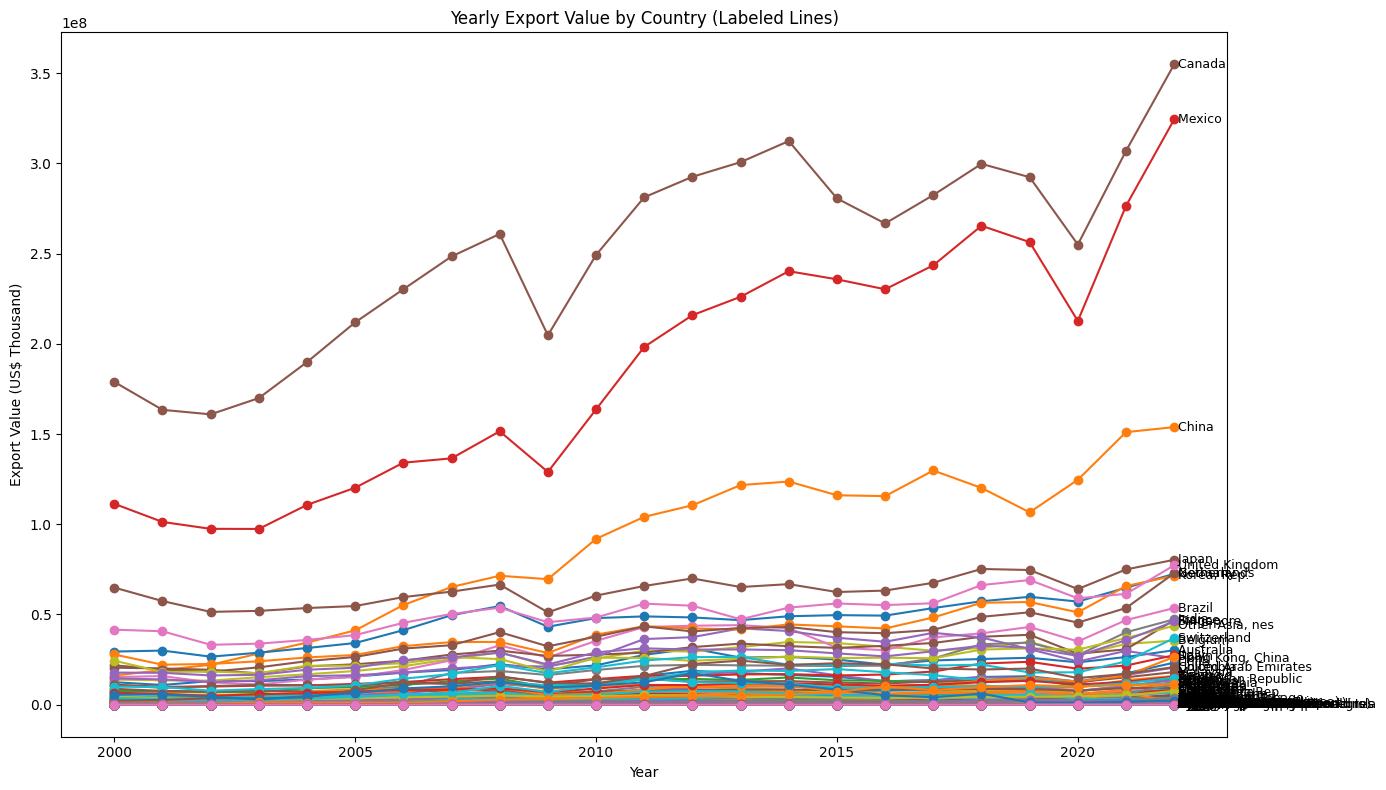

In [14]:
# Combine all yearly dataframes into one, adding a 'Year' column
all_data = []
for year, df in impexp_data.items():
    df_copy = df.copy()
    df_copy['Year'] = int(year)
    all_data.append(df_copy)

combined_df = pd.concat(all_data, ignore_index=True)

# Create a pivot table for imports: rows are years, columns are countries,
# and values are summed import values.
import_pivot = combined_df.pivot_table(
    index='Year',
    columns='Partner Name',
    values='Import (US$ Thousand)',
    aggfunc='sum'
)

# Create a pivot table for exports: rows are years, columns are countries,
# and values are summed export values.
export_pivot = combined_df.pivot_table(
    index='Year',
    columns='Partner Name',
    values='Export (US$ Thousand)',
    aggfunc='sum'
)

# Plotting Imports with in-graph labels
plt.figure(figsize=(14, 8))
for country in import_pivot.columns:
    plt.plot(import_pivot.index, import_pivot[country], marker='o')
    # Get the last data point for labeling
    last_year = import_pivot.index[-1]
    last_value = import_pivot[country].iloc[-1]
    plt.text(last_year, last_value, f" {country}", fontsize=9, va='center', ha='left')
plt.xlabel('Year')
plt.ylabel('Import Value (US$ Thousand)')
plt.title('Yearly Import Value by Country (Labeled Lines)')
plt.tight_layout()
plt.show()

# Plotting Exports with in-graph labels
plt.figure(figsize=(14, 8))
for country in export_pivot.columns:
    plt.plot(export_pivot.index, export_pivot[country], marker='o')
    # Get the last data point for labeling
    last_year = export_pivot.index[-1]
    last_value = export_pivot[country].iloc[-1]
    plt.text(last_year, last_value, f" {country}", fontsize=9, va='center', ha='left')
plt.xlabel('Year')
plt.ylabel('Export Value (US$ Thousand)')
plt.title('Yearly Export Value by Country (Labeled Lines)')
plt.tight_layout()
plt.show()



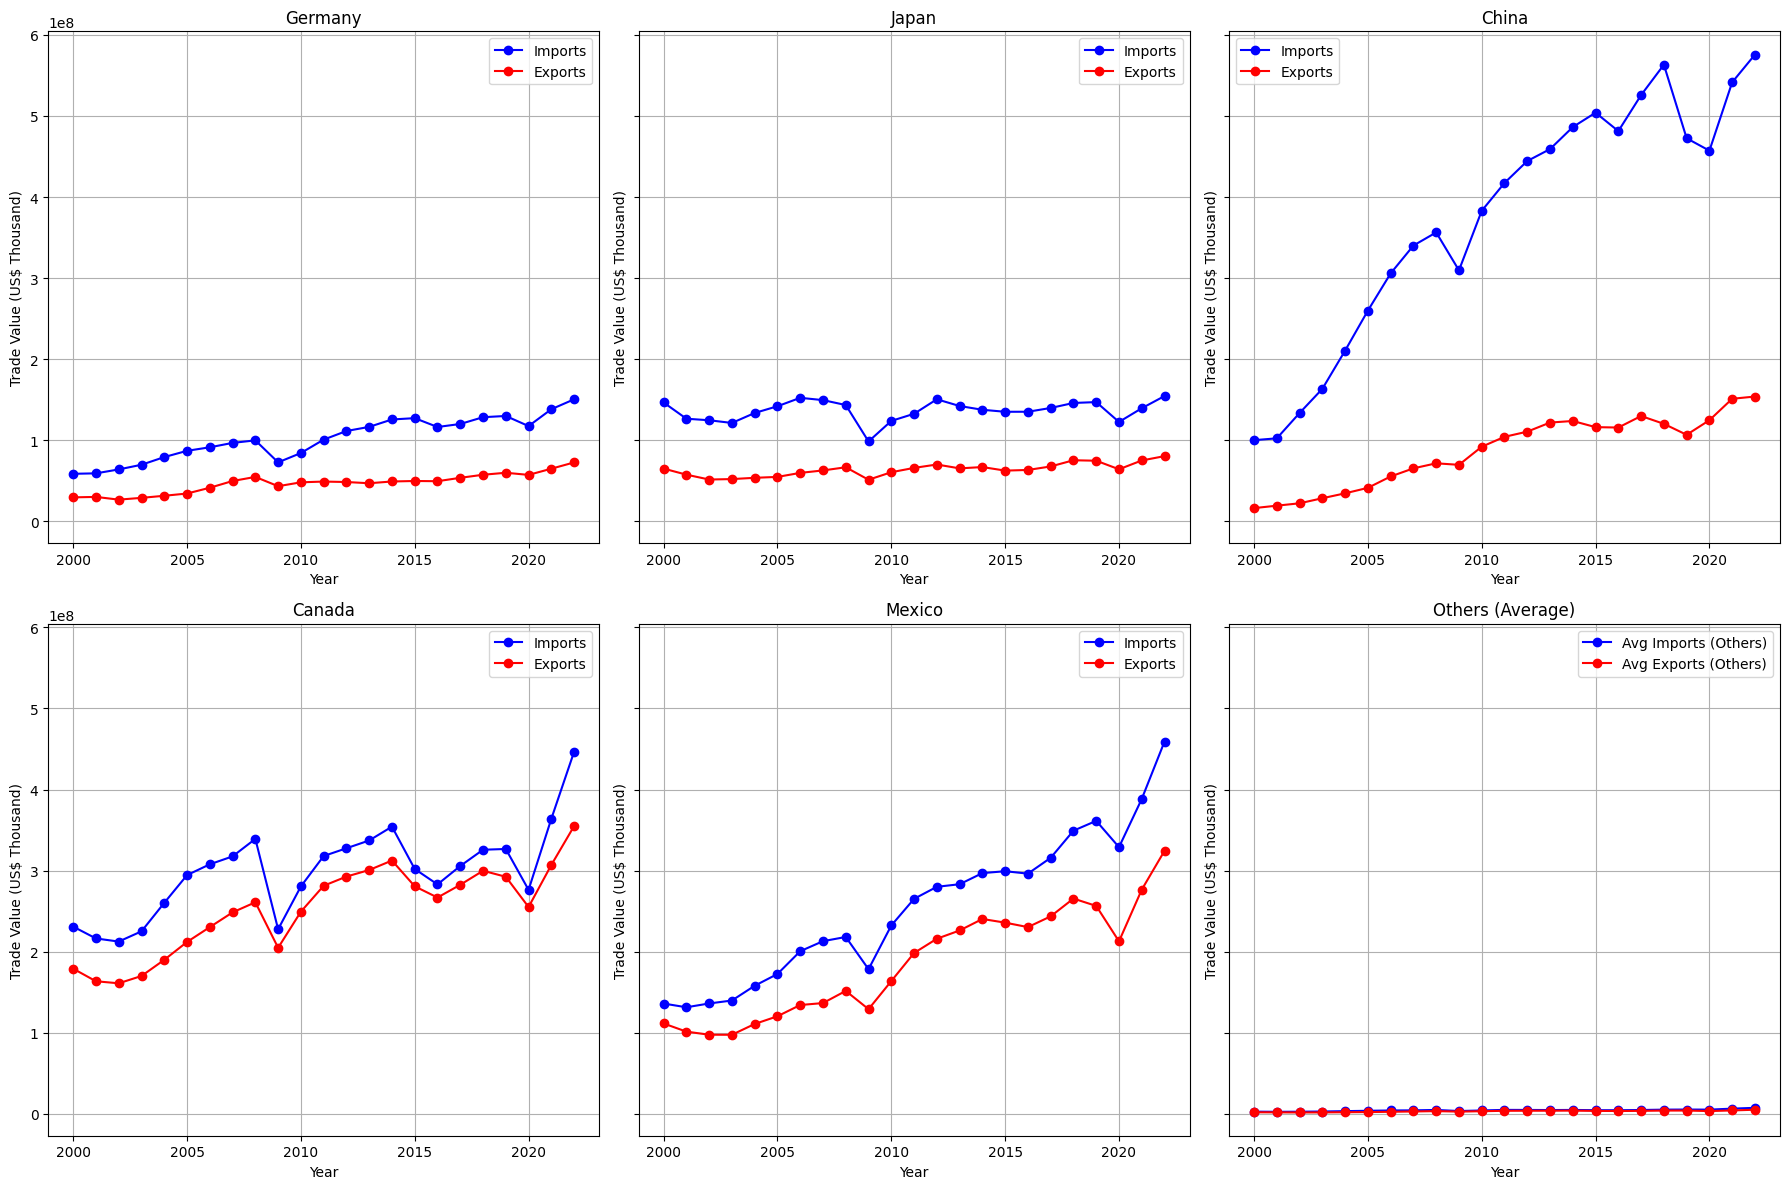

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# -----------------------------
# Prepare the data
# -----------------------------
# Combine all yearly dataframes into one DataFrame with a Year column
all_data = []
for year, df in impexp_data.items():
    df_copy = df.copy()
    df_copy['Year'] = int(year)
    all_data.append(df_copy)
combined_df = pd.concat(all_data, ignore_index=True)

# Create pivot tables for imports and exports.
# Rows: Year, Columns: Partner Name, Values: sum of trade values
import_pivot = combined_df.pivot_table(
    index='Year',
    columns='Partner Name',
    values='Import (US$ Thousand)',
    aggfunc='sum'
)
export_pivot = combined_df.pivot_table(
    index='Year',
    columns='Partner Name',
    values='Export (US$ Thousand)',
    aggfunc='sum'
)

# Ensure the years are in order
import_pivot.sort_index(inplace=True)
export_pivot.sort_index(inplace=True)

# -----------------------------
# Compute series for "Others"
# -----------------------------
# Define the top trade partners
top5_countries = ["Germany", "Japan", "China", "Canada", "Mexico"]
# Get all other countries (those not in the top 5)
others = [country for country in import_pivot.columns if country not in top5_countries]

# Compute the average import and export values for these other countries by year
others_import = import_pivot[others].mean(axis=1)
others_export = export_pivot[others].mean(axis=1)

# -----------------------------
# Plotting: Create a 3x2 grid of subplots
# -----------------------------
fig, axes = plt.subplots(2, 3, figsize=(18, 12), sharey=True)
axes = axes.flatten()  # Flatten to simplify indexing

# Plot each of the top 5 countries in its own subplot
for i, country in enumerate(top5_countries):
    ax = axes[i]
    # Plot imports (blue) if data is available
    if country in import_pivot.columns:
        ax.plot(import_pivot.index, import_pivot[country], color='blue', marker='o', label='Imports')
    # Plot exports (red) if data is available
    if country in export_pivot.columns:
        ax.plot(export_pivot.index, export_pivot[country], color='red', marker='o', label='Exports')
    ax.set_title(country)
    ax.set_xlabel("Year")
    ax.set_ylabel("Trade Value (US$ Thousand)")
    ax.legend()
    ax.grid(True)  # Add grid lines

# Plot the averaged "Others" in the 6th subplot
ax = axes[-1]
ax.plot(others_import.index, others_import, color='blue', marker='o', label='Avg Imports (Others)')
ax.plot(others_export.index, others_export, color='red', marker='o', label='Avg Exports (Others)')
ax.set_title("Others (Average)")
ax.set_xlabel("Year")
ax.set_ylabel("Trade Value (US$ Thousand)")
ax.legend()
ax.grid(True)  # Add grid lines
plt.tight_layout()
plt.show()


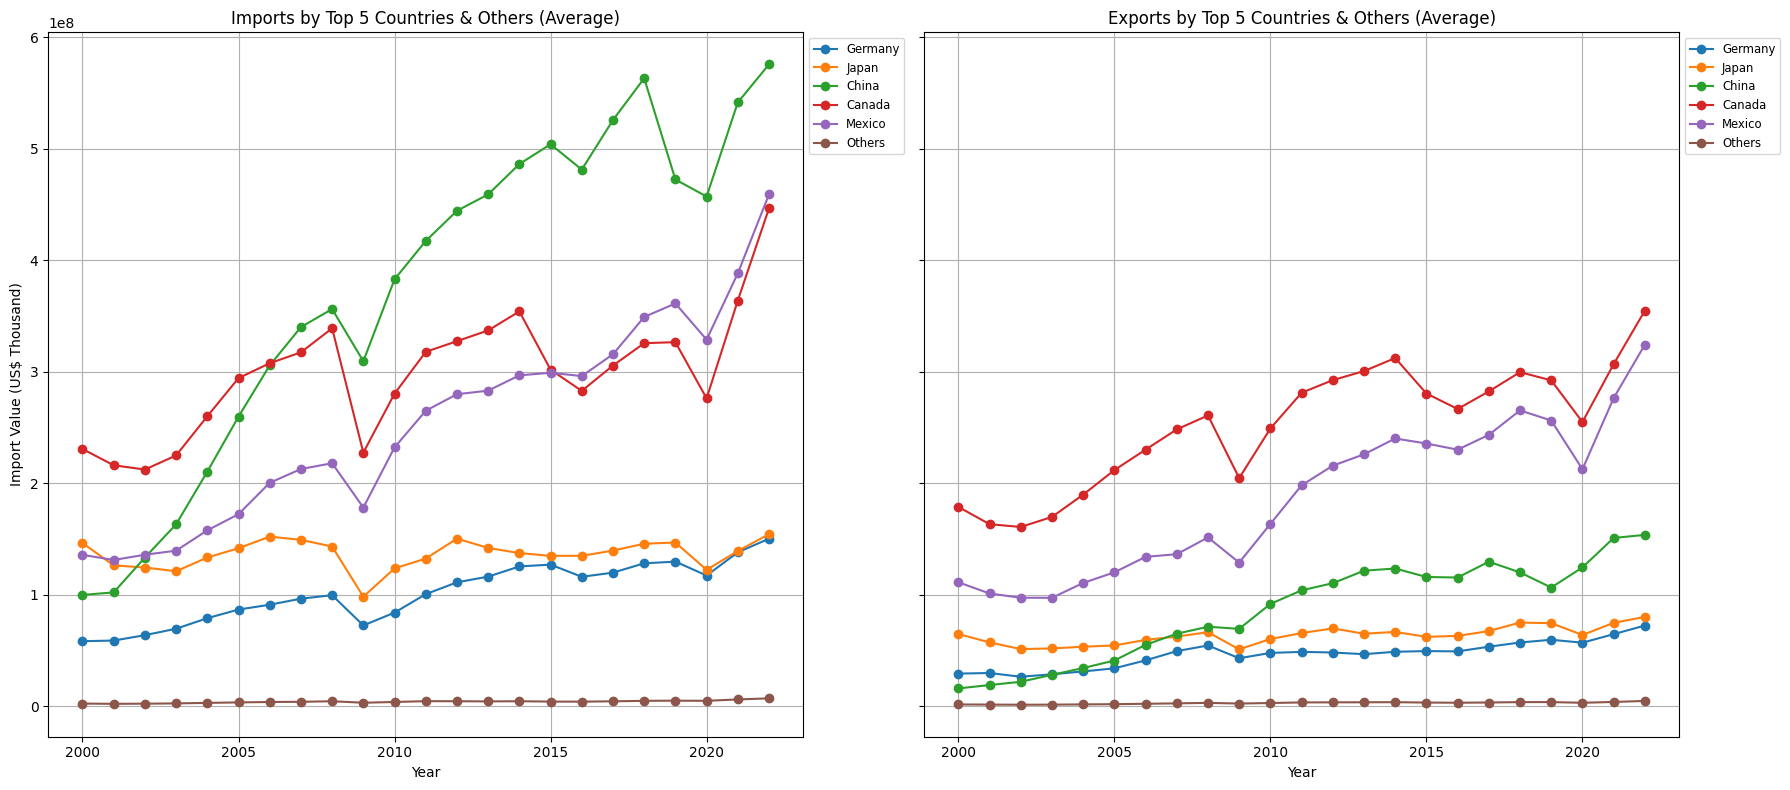

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# -----------------------------
# Prepare the data
# -----------------------------
# Combine all yearly dataframes into one DataFrame with a Year column
all_data = []
for year, df in impexp_data.items():
    df_copy = df.copy()
    df_copy['Year'] = int(year)
    all_data.append(df_copy)
combined_df = pd.concat(all_data, ignore_index=True)

# Create pivot tables for imports and exports.
# Rows: Year, Columns: Partner Name, Values: sum of trade values
import_pivot = combined_df.pivot_table(
    index='Year',
    columns='Partner Name',
    values='Import (US$ Thousand)',
    aggfunc='sum'
)
export_pivot = combined_df.pivot_table(
    index='Year',
    columns='Partner Name',
    values='Export (US$ Thousand)',
    aggfunc='sum'
)

# Ensure the years are in order
import_pivot.sort_index(inplace=True)
export_pivot.sort_index(inplace=True)

# -----------------------------
# Define Top 5 and Compute "Others"
# -----------------------------
top5_countries = ["Germany", "Japan", "China", "Canada", "Mexico"]
others = [country for country in import_pivot.columns if country not in top5_countries]

# Compute the average import and export values for "others" by year
others_import = import_pivot[others].mean(axis=1)
others_export = export_pivot[others].mean(axis=1)

# -----------------------------
# Define a uniform color mapping
# -----------------------------
cmap = plt.get_cmap('tab10')
color_map = {}
for i, country in enumerate(top5_countries):
    color_map[country] = cmap(i)
color_map["Others"] = cmap(len(top5_countries))  # Next available color

# -----------------------------
# Plotting: Create two subplots (Imports and Exports)
# -----------------------------
fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=True)

# Plot Imports: use the uniform colors
for country in top5_countries:
    if country in import_pivot.columns:
        axes[0].plot(import_pivot.index, import_pivot[country],
                     marker='o', label=country, color=color_map[country])
axes[0].plot(others_import.index, others_import,
             marker='o', label="Others", color=color_map["Others"])
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Import Value (US$ Thousand)")
axes[0].set_title("Imports by Top 5 Countries & Others (Average)")
axes[0].grid(True)
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')

# Plot Exports: use the same uniform colors
for country in top5_countries:
    if country in export_pivot.columns:
        axes[1].plot(export_pivot.index, export_pivot[country],
                     marker='o', label=country, color=color_map[country])
axes[1].plot(others_export.index, others_export,
             marker='o', label="Others", color=color_map["Others"])
axes[1].set_xlabel("Year")
axes[1].set_title("Exports by Top 5 Countries & Others (Average)")
axes[1].grid(True)
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')

plt.tight_layout()
plt.show()


# Difference in Differences Analysis (DiD)

In [30]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

# -----------------------------
# Combine all yearly data into one DataFrame
# -----------------------------
all_data = []
for year, df in impexp_data.items():
    df_copy = df.copy()
    df_copy['Year'] = int(year)
    all_data.append(df_copy)
combined_df = pd.concat(all_data, ignore_index=True)

# -----------------------------
# Create DiD variables
# -----------------------------
# Assume that the tariff policy change (treatment) occurred in 2018.
# Create a 'Post' dummy: 1 if Year >= 2018, else 0.
combined_df['Post'] = (combined_df['Year'] >= 2018).astype(int)

# Create a 'Treat' dummy: 1 if the Partner is 'China' (treated group), else 0.
combined_df['Treat'] = (combined_df['Partner Name'] == 'China').astype(int)

# Create an outcome variable.
# We use the logarithm of import value (adding 1 to avoid taking log of zero).
combined_df['log_import'] = np.log(combined_df['Import (US$ Thousand)'] + 1)

# -----------------------------
# Run the DiD Regression Model
# -----------------------------
# The regression model is:
# log_import = α + β1*Treat + β2*Post + δ*(Treat*Post) + ε
# Here, δ (the coefficient on the interaction term) is our DiD estimator.
did_model = smf.ols("log_import ~ Treat + Post + Treat:Post", data=combined_df).fit()

# Display the regression summary
print(did_model.summary())


                            OLS Regression Results                            
Dep. Variable:             log_import   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     35.21
Date:                Wed, 12 Mar 2025   Prob (F-statistic):           1.62e-22
Time:                        16:40:40   Log-Likelihood:                -13884.
No. Observations:                5084   AIC:                         2.778e+04
Df Residuals:                    5080   BIC:                         2.780e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.7877      0.059    199.488      0.0

Here's how you might interpret the results:

- **Intercept (11.7877):**  
  This is the expected log import value for the control group (countries other than China) before the policy change. In other words, before 2018, the baseline log(import value) is about 11.79.

- **Treat (7.7141, p<0.001):**  
  The positive and significant coefficient indicates that, before the tariff policy change, China (the treated group) had a much higher log import value compared to the control group. Specifically, China's log(import value) was, on average, about 7.71 units higher than that of other countries.

- **Post (0.2897, p=0.022):**  
  This coefficient shows that after the policy change (post-2018), the control group experienced an increase of about 0.29 in their log import value. This change is statistically significant, indicating a general post-policy increase in imports for the control group.

- **Treat:Post (0.2773, p=0.883):**  
  This interaction term is the key Difference-in-Differences (DiD) estimator. Its coefficient (0.2773) represents the additional change in log import value for China relative to the control group after the tariff policy change. However, because its p-value is very high (0.883), we conclude that this effect is not statistically significant. In other words, there isn’t evidence to suggest that the tariff policy had a differential impact on China's imports compared to the control group.

- **Model Fit (R-squared = 0.020):**  
  The R-squared value is quite low, meaning that only about 2% of the variation in the log import values is explained by the model. While this might seem low, in policy analyses like these—where many other factors can influence trade flows—this isn't uncommon. The main focus here is on the significance and magnitude of the coefficients, especially the interaction term.

### Overall Interpretation

- **Baseline Difference:**  
  China had significantly higher imports compared to other countries before the policy change.

- **General Trend:**  
  There was a small but statistically significant increase in import values for the control group after the policy change.

- **Policy Impact (DiD Estimator):**  
  The lack of significance in the interaction term (Treat:Post) suggests that the tariff policy change did not have a statistically significant additional effect on China's import values compared to the changes observed in other countries.

In summary, while baseline differences and overall time trends exist, the analysis does not provide evidence that the tariff policy change significantly altered the import pattern for China relative to other trading partners.

The causal inference in this DiD analysis comes from isolating the effect of the tariff policy change on the treated group (China) by comparing the before-and-after changes in outcomes for China with those of a control group (all other countries). Here’s how it works:

- **Parallel Trends Assumption:**  
  We assume that, in the absence of the tariff policy change, the trend in the log(import value) for China (the treated group) would have followed the same pattern as the control group. This assumption is critical because it lets us attribute any divergence between the two groups after the policy change to the policy itself.

- **The DiD Estimator (Interaction Term):**  
  The coefficient on the interaction term (`Treat:Post`) is our causal estimate. It measures the additional change in the outcome for China relative to the control group after the policy implementation. If the coefficient were statistically significant, we could say that the policy had a causal effect on the trade values.

- **Interpreting Causality:**  
  In our regression output, the interaction term (`Treat:Post`) has a coefficient of 0.2773, but it is not statistically significant (p=0.883). This suggests that, based on this model, we do not have evidence to claim a causal effect of the tariff policy on China’s import values relative to other countries.

- **Caveats:**  
  The validity of this causal interpretation depends on the robustness of the parallel trends assumption and the absence of other confounding factors that might differentially affect China after 2018.

In summary, the causal inference part lies in using the difference in trends (pre- and post-policy) between China and the control group to estimate what the effect of the tariff policy would have been if we could observe a counterfactual for China. The DiD estimator is our tool for isolating that causal impact, provided the key assumptions hold.

# Sector and Product Group Analysis

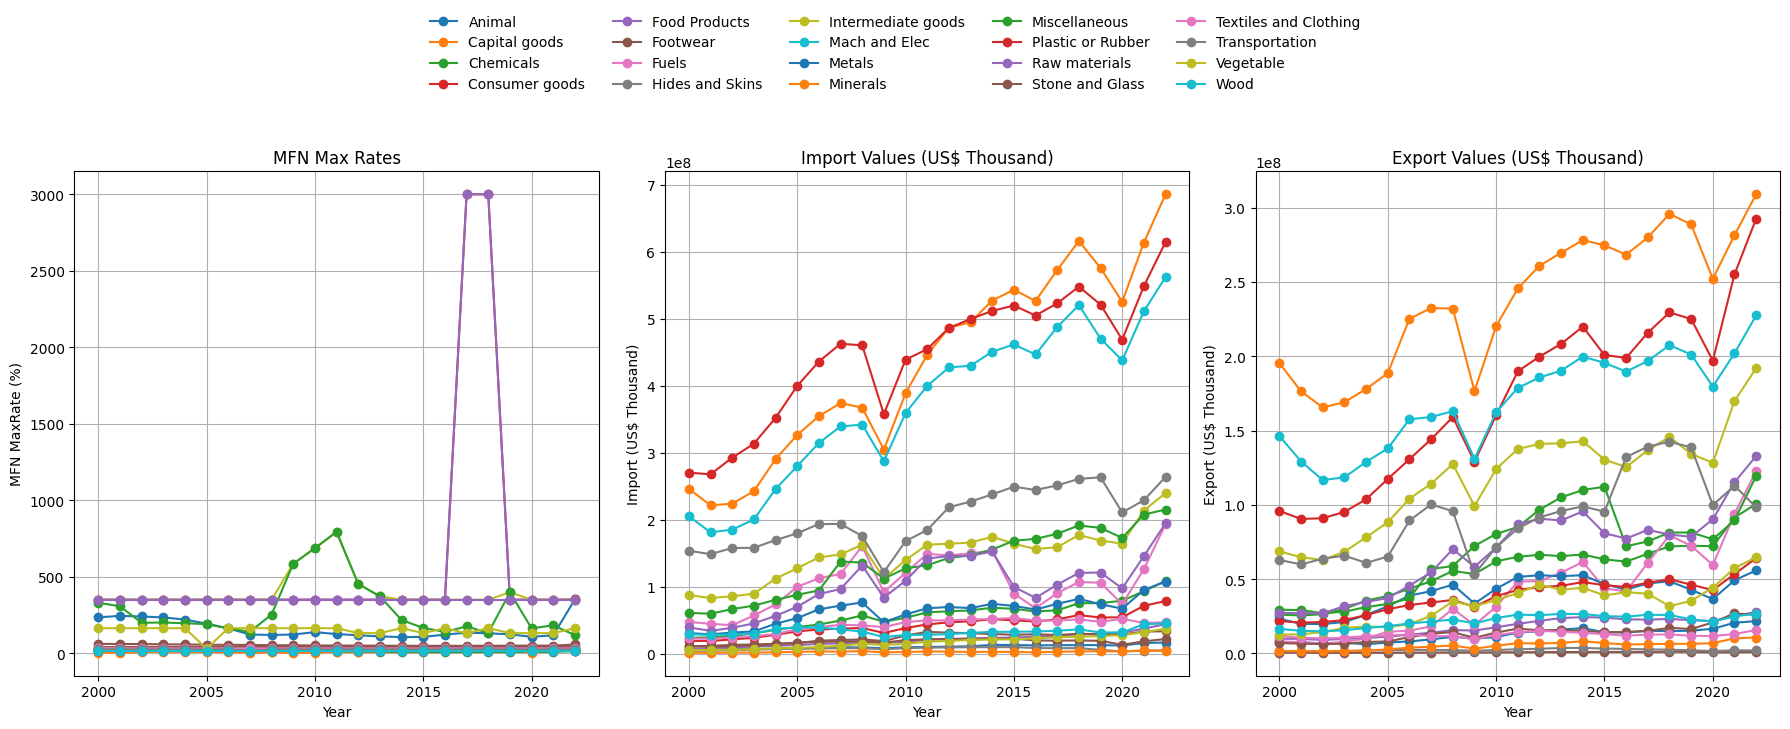

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Pivot for MFN Max Rates
# If multiple rows exist per Year-ProductGroup, we take the maximum of MFN MaxRate.
df_mfn = main_df.pivot_table(
    index='Year',
    columns='Product Group',
    values='MFN MaxRate (%)',
    aggfunc='max'
)
df_mfn.sort_index(inplace=True)
df_mfn = df_mfn.drop('All Products', axis=1)

# Pivot for Imports (summing any duplicates by Year-ProductGroup)
df_import = main_df.pivot_table(
    index='Year',
    columns='Product Group',
    values='Import (US$ Thousand)',
    aggfunc='sum'
)
df_import.sort_index(inplace=True)
df_import = df_import.drop('All Products', axis=1)

# Pivot for Exports (summing any duplicates by Year-ProductGroup)
df_export = main_df.pivot_table(
    index='Year',
    columns='Product Group',
    values='Export (US$ Thousand)',
    aggfunc='sum'
)
df_export.sort_index(inplace=True)
df_export = df_export.drop('All Products', axis=1)


# Create a 1x3 grid of subplots, sharing the x-axis
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True)

# Titles for each subplot
axes[0].set_title("MFN Max Rates")
axes[1].set_title("Import Values (US$ Thousand)")
axes[2].set_title("Export Values (US$ Thousand)")

# Plot each Product Group as a separate line in all three subplots
for product_group in df_mfn.columns:
    # MFN Max Rates
    axes[0].plot(
        df_mfn.index,
        df_mfn[product_group],
        label=product_group,
        marker = 'o'
    )
    # Import Values
    axes[1].plot(
        df_import.index,
        df_import[product_group],
        label=product_group,
        marker = 'o'
    )
    # Export Values
    axes[2].plot(
        df_export.index,
        df_export[product_group],
        label=product_group,
        marker = 'o'
    )

# Set x-axis and y-axis labels
axes[0].set_xlabel("Year")
axes[1].set_xlabel("Year")
axes[2].set_xlabel("Year")

axes[0].set_ylabel("MFN MaxRate (%)")
axes[1].set_ylabel("Import (US$ Thousand)")
axes[2].set_ylabel("Export (US$ Thousand)")\

for i in range(3): axes[i].grid(True)

# Extract legend handles/labels from one subplot (they are the same across all)
handles, labels = axes[0].get_legend_handles_labels()

# Place a single legend at the top center (adjust as needed)
fig.legend(
    handles,
    labels,
    loc='lower center',
    bbox_to_anchor=(0.5, 1.05),
    ncol=5,  # Increase/decrease for layout
    frameon=False
)

plt.tight_layout()
plt.show()


# Clustering Tax Policies

<ipython-input-46-85d5050b72aa>:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(country, (agg_df['PCA1'][i], agg_df['PCA2'][i]), fontsize=8, alpha=0.8)


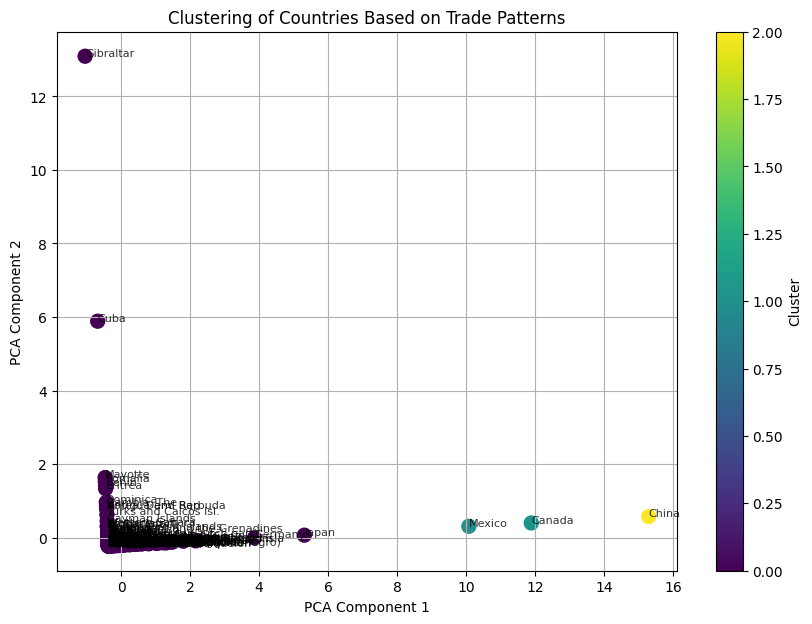

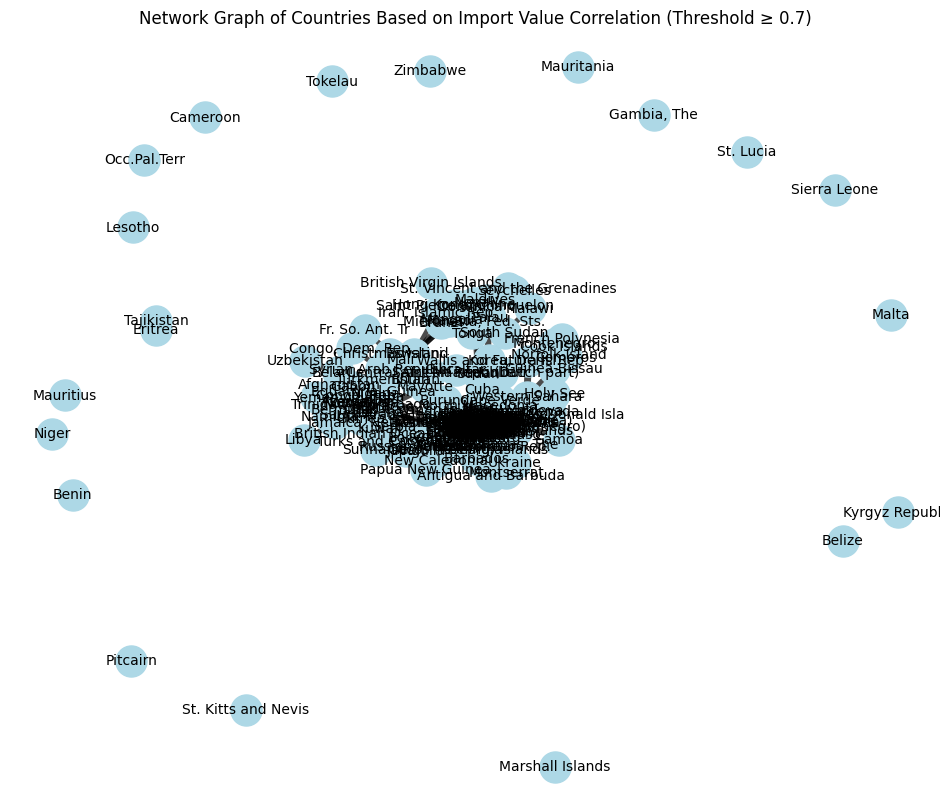

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import networkx as nx

# -----------------------------
# Part 1: Clustering Analysis
# -----------------------------

# Combine all yearly dataframes into one DataFrame with a 'Year' column
all_data = []
for year, df in impexp_data.items():
    df_copy = df.copy()
    df_copy['Year'] = int(year)
    all_data.append(df_copy)
combined_df = pd.concat(all_data, ignore_index=True)

# Aggregate trade data by country over all years
# We compute total imports, total exports, trade balance (exports - imports),
# and export/import ratio (adding a tiny value to avoid division by zero).
agg_df = combined_df.groupby('Partner Name').agg({
    'Import (US$ Thousand)': 'sum',
    'Export (US$ Thousand)': 'sum'
})
agg_df['Trade Balance'] = agg_df['Export (US$ Thousand)'] - agg_df['Import (US$ Thousand)']
agg_df['Export/Import Ratio'] = agg_df['Export (US$ Thousand)'] / (agg_df['Import (US$ Thousand)'] + 1e-6)

# Select features for clustering
features = agg_df[['Import (US$ Thousand)', 'Export (US$ Thousand)', 'Trade Balance', 'Export/Import Ratio']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply k-means clustering (assuming 3 clusters here)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(features_scaled)
agg_df['Cluster'] = clusters

# Use PCA to reduce the features to 2 dimensions for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled)
agg_df['PCA1'] = pca_result[:, 0]
agg_df['PCA2'] = pca_result[:, 1]

# Plot the clustering results
plt.figure(figsize=(10, 7))
scatter = plt.scatter(agg_df['PCA1'], agg_df['PCA2'], c=agg_df['Cluster'], cmap='viridis', s=100)
for i, country in enumerate(agg_df.index):
    plt.annotate(country, (agg_df['PCA1'][i], agg_df['PCA2'][i]), fontsize=8, alpha=0.8)
plt.title('Clustering of Countries Based on Trade Patterns')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

# -----------------------------
# Part 2: Network Analysis
# -----------------------------
# Build a network based on the correlation of yearly import values among countries.
# Create a pivot table: rows = Year, columns = Partner Name, values = total import value per year.
import_pivot = combined_df.pivot_table(
    index='Year',
    columns='Partner Name',
    values='Import (US$ Thousand)',
    aggfunc='sum'
)

# Compute the correlation matrix between countries based on their yearly import values.
corr_matrix = import_pivot.corr()

# Define a correlation threshold for drawing an edge between two countries.
threshold = 0.7

# Build the network graph.
G = nx.Graph()
for country in corr_matrix.columns:
    G.add_node(country)

# Add an edge for each pair of countries with correlation above the threshold.
for i, country1 in enumerate(corr_matrix.columns):
    for j, country2 in enumerate(corr_matrix.columns):
        if i < j:
            corr_value = corr_matrix.loc[country1, country2]
            if corr_value >= threshold:
                G.add_edge(country1, country2, weight=corr_value)

# Draw the network graph using a spring layout.
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42)
# Determine edge widths proportional to the correlation value.
edges = G.edges(data=True)
edge_widths = [d['weight'] * 5 for (u, v, d) in edges]  # Multiplied for better visibility

nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')
nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.7)
nx.draw_networkx_labels(G, pos, font_size=10)
plt.title('Network Graph of Countries Based on Import Value Correlation (Threshold ≥ 0.7)')
plt.axis('off')
plt.show()


Below are some guidelines for interpreting each figure:

---

## 1. Clustering of Countries Based on Trade Patterns (PCA Scatter Plot)

**What the plot shows:**

1. **Axes (PCA1, PCA2):**  
   - Principal Component Analysis (PCA) condenses the variability in your dataset (in this case, total imports, total exports, trade balance, and export/import ratio) into two principal components (on the x- and y-axes).  
   - Countries that appear close together in the scatter plot share *similar trade patterns* with the U.S. across these four aggregated metrics.

2. **Colors (Cluster Labels):**  
   - K-Means clustering was applied to these four features, producing distinct color-coded clusters (e.g., 0, 1, 2).  
   - Each cluster groups countries that exhibit broadly *similar overall trade relationships* with the U.S.

3. **Positions of Countries:**
   - **Far from the Main Cluster:** Countries such as Gibraltar and Cuba (in your example) are outliers, suggesting unusual or distinctive trade patterns compared to the majority. They might have either very high or very low values in one or more features (e.g., a very high export/import ratio, or extremely small total trade).  
   - **Large Central Cluster:** The dense cluster near the origin (0,0) indicates many countries with more “typical” trade profiles relative to the rest of the world—i.e., moderate imports, moderate exports, relatively balanced trade, etc.  
   - **Separate Smaller Clusters:** Countries like Canada, Mexico, China, etc., may appear together in another cluster if they share large trade volumes, distinct trade balances, or other distinguishing factors.

**How to interpret the clusters:**

- **Cluster 0 (for example, the purple group):** Likely the largest group, consisting of countries that have moderate trade volumes and ratios, forming a baseline.  
- **Cluster 1 (e.g., green group):** Could be countries with high total trade values or a particular skew in trade balance.  
- **Cluster 2 (e.g., yellow group):** Might contain just a few outliers or highly specialized trade partners with unusual export/import ratios.

To dive deeper, you can:
- Look at the actual cluster labels in your DataFrame to see which countries ended up in each cluster.
- Examine cluster-level statistics (e.g., average imports, average exports, trade balance) to characterize each cluster.

---

## 2. Network Graph of Countries Based on Import Value Correlation

**What the graph shows:**

1. **Nodes (Countries):**  
   Each country is represented by a node.  

2. **Edges (Correlations Above Threshold):**  
   An edge between two nodes indicates that the correlation of their *yearly import values* with the U.S. is above the chosen threshold (0.7 in your example).  
   - A higher threshold (e.g., 0.8 or 0.9) would yield fewer edges, capturing only the strongest similarities in import patterns.  
   - A lower threshold (e.g., 0.5) would result in a more densely connected network.

3. **Layout (Spring Layout):**  
   The spring layout positions nodes so that more strongly connected groups tend to cluster together, while nodes with weaker or no connections move to the periphery.

**How to interpret the clusters and outliers:**

- **Large Central “Hairball”:** Many countries are bunched together in the middle, indicating that their import time series with the U.S. are highly correlated with each other. This often happens if a group of countries follow global economic cycles similarly or have trade flows that move in tandem with large global trends (e.g., expansions and recessions).  
- **Peripheral Countries:** Those on the outer edges (e.g., small island nations, countries with sporadic or unique import patterns) have weaker correlations with the central cluster, meaning their trade patterns with the U.S. do not strongly mirror the majority.

**Why correlation might be high or low:**

- **High Correlation:** Countries could be similarly affected by global economic shifts, have similar trade agreements, or experience parallel industrial or consumption patterns.  
- **Low Correlation:** Countries with niche export/import structures, political or economic instability, or drastically different trade cycles may not track global patterns as closely.

---

## Putting It All Together

1. **Clustering vs. Network:**
   - **Clustering Analysis:** Focuses on each country’s *aggregate* trade profile (total imports, total exports, trade balance, etc.) across *all years combined*.  
   - **Network Analysis:** Focuses on how *year-to-year changes* in imports (i.e., the shape of each country’s time series) correlate with others.

2. **Consistent Findings or Contrasts:**
   - If a group of countries is clustered together in the PCA plot, you might also see them interconnected in the network graph—suggesting they share both overall volume similarities (clustering) and similar year-to-year fluctuations (network).  
   - Conversely, a country could have *similar total trade volumes* to others but *different yearly patterns*, causing it to appear in the same PCA cluster but remain on the periphery of the network.

3. **Practical Implications:**
   - **Policy or Supply Chain:** Countries that move in sync with the U.S. import trends may be impacted similarly by global events or tariff policies.  
   - **Market Analysis:** The cluster analysis can help identify new or potential markets that share characteristics with established major trading partners.  
   - **Risk Management:** Outliers in both analyses might require special attention for supply chain or policy planning.

Overall, these visualizations give you two complementary views of the U.S. trade relationships:  
- **Clustering (Aggregate Similarities):** Who is “most alike” in terms of total trade volumes and balances?  
- **Network (Correlation Over Time):** Whose year-to-year import trends tend to rise and fall together?

By combining these insights, you can identify potential blocks of countries with common trade behaviors and highlight outliers that may need unique policy or business strategies.

# Tariff Impact Regression Analysis

In [48]:
import pandas as pd
import statsmodels.api as sm

# Select the relevant columns for the regression.
# Here, we use the following columns:
# - Dependent variable: 'Import (US$ Thousand)'
# - Independent variables:
#    'MFN Duty Free Tariff Lines Share (%)',
#    'MFN Dutiable Tariff Lines Share (%)',
#    'MFN AVE Tariff Lines Share (%)',
#    'MFN MaxRate (%)',
#    'World Growth (%)',
#    'Country Growth (%)'
cols = [
    'Import (US$ Thousand)',
    'MFN Duty Free Tariff Lines Share (%)',
    'MFN Dutiable Tariff Lines Share (%)',
    'MFN AVE Tariff Lines Share (%)',
    'MFN MaxRate (%)',
    'World Growth (%)',
    'Country Growth (%)'
]

# Filter the DataFrame to include only the selected columns and drop any rows with missing values
df_reg = main_df[cols].dropna()

# Define the dependent variable (y) and independent variables (X)
y = df_reg['Import (US$ Thousand)']
X = df_reg.drop('Import (US$ Thousand)', axis=1)

# Add a constant term to the independent variables (for the intercept)
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())


                              OLS Regression Results                             
Dep. Variable:     Import (US$ Thousand)   R-squared:                       0.120
Model:                               OLS   Adj. R-squared:                  0.118
Method:                    Least Squares   F-statistic:                     54.85
Date:                   Wed, 12 Mar 2025   Prob (F-statistic):           1.09e-63
Time:                           17:47:00   Log-Likelihood:                -46728.
No. Observations:                   2415   AIC:                         9.347e+04
Df Residuals:                       2408   BIC:                         9.351e+04
Df Model:                              6                                         
Covariance Type:               nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

These results suggest that, overall, the tariff‐related measures in our model explain only about 12% of the variation in U.S. import values (R² = 0.120). In other words, while the model is statistically significant overall (F-statistic p-value ≈ 1.09e-63), many of the individual predictors do not reach conventional levels of significance. Here are some key points from the output:

1. **Model Fit:**  
   - **R-squared (0.120):** The independent variables explain about 12% of the variability in import values, implying that many other factors likely influence imports.  
   - **F-statistic:** The overall model is statistically significant, indicating that at least one predictor is related to the import values.

2. **Significant Predictors:**  
   - **MFN AVE Tariff Lines Share (%):**  
     - Coefficient: -809,900  
     - p-value: < 0.001  
     - Interpretation: A 1 percentage point increase in the average tariff lines share is associated with a decrease of about 810,000 US$ Thousand in imports, holding other factors constant. This is statistically significant and suggests a strong negative relationship.
   - **MFN MaxRate (%):**  
     - Coefficient: 62,220  
     - p-value: < 0.001  
     - Interpretation: A 1 percentage point increase in the maximum tariff rate is associated with an increase of about 62,220 US$ Thousand in imports. This positive relationship is statistically significant.

3. **Non-significant Predictors:**  
   - **MFN Duty Free Tariff Lines Share (%)** and **MFN Dutiable Tariff Lines Share (%)** have p-values of 0.093 and 0.238 respectively, suggesting that, within this model, their associations with import values are not statistically significant at the 5% level.
   - **World Growth (%)** and **Country Growth (%)** also do not show statistically significant effects, indicating that these growth measures, as specified, might not have a clear direct impact on import values in this model.

4. **Other Diagnostics:**  
   - **Constant:** The intercept is not statistically significant, which is common in models where the dependent variable is on a very different scale (here, millions in US$ Thousand).
   - **Residual Diagnostics:**  
     - The Durbin-Watson statistic of 1.573 hints at some positive autocorrelation, which might warrant further investigation.  
     - Omnibus and Jarque-Bera tests indicate non-normality of the residuals, suggesting that there might be outliers or other specification issues that could be explored further.

### Overall Interpretation

The significant negative coefficient for **MFN AVE Tariff Lines Share (%)** implies that, on average, higher proportions of tariff lines subject to average tariff rates are associated with lower import values. In contrast, the positive coefficient for **MFN MaxRate (%)** might reflect that higher maximum tariff rates are linked with increased imports—perhaps because higher tariffs may be applied to products with high domestic demand or other factors not captured here. However, the low R-squared suggests that the model is missing other key predictors that affect import values.

### Next Steps

- **Model Expansion:** Consider adding additional predictors (e.g., exchange rates, domestic economic indicators, industry-specific variables) that may better capture the variability in import values.
- **Diagnostic Checks:** Perform further residual analysis and consider transformations or robust regression techniques to address issues like non-normality and autocorrelation.
- **Subgroup Analyses:** It might be useful to segment the data (e.g., by product group or country) to see if the relationships differ across different contexts.

This regression provides a useful starting point for understanding how certain tariff measures correlate with import values, but it also points to the need for a more comprehensive model to capture the complexity of international trade.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


                                 SARIMAX Results                                 
Dep. Variable:     Import (US$ Thousand)   No. Observations:                   23
Model:                    ARIMA(1, 1, 1)   Log Likelihood                -456.047
Date:                   Wed, 12 Mar 2025   AIC                            918.094
Time:                           17:50:47   BIC                            921.367
Sample:                       01-01-2000   HQIC                           918.865
                            - 01-01-2022                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9755      0.291     -3.352      0.001      -1.546      -0.405
ma.L1          0.9587      0.376      2.550      0.011       0.222       1.695
sigma2      6.593e+16   2.37

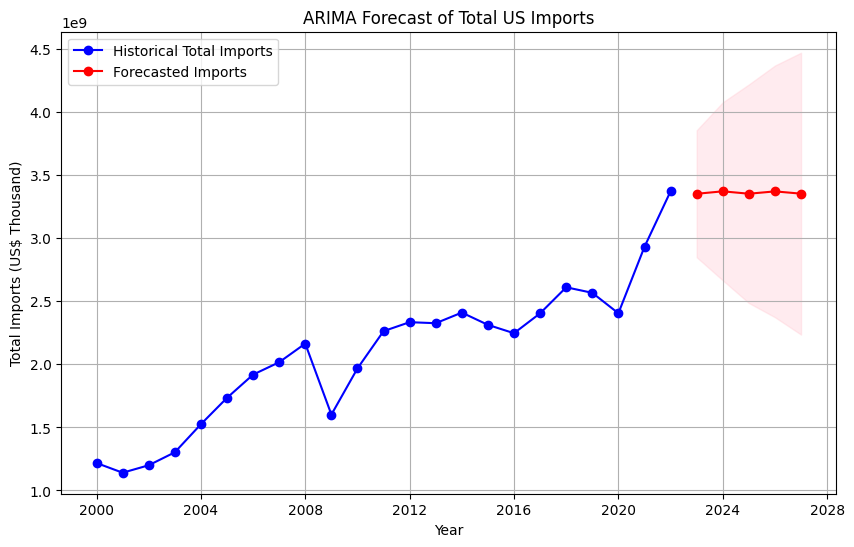

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# -----------------------------
# Prepare the Data: Combine all yearly dataframes
# -----------------------------
all_data = []
for year, df in impexp_data.items():
    df_copy = df.copy()
    df_copy['Year'] = int(year)
    all_data.append(df_copy)
combined_df = pd.concat(all_data, ignore_index=True)

# Aggregate total imports by year
total_import_by_year = combined_df.groupby('Year')['Import (US$ Thousand)'].sum()

# Convert the index to a datetime index (using January 1st for each year)
total_import_by_year.index = pd.to_datetime(total_import_by_year.index.astype(str) + '-01-01')

# -----------------------------
# Fit an ARIMA Model
# -----------------------------
# Here we use an ARIMA(1,1,1) model for demonstration purposes.
model = ARIMA(total_import_by_year, order=(1, 1, 1))
model_fit = model.fit()

# Print a summary of the model fit
print(model_fit.summary())

# -----------------------------
# Forecast Future Values
# -----------------------------
forecast_steps = 5  # Forecast the next 5 years
forecast_result = model_fit.get_forecast(steps=forecast_steps)
forecast_values = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

# -----------------------------
# Plot Historical Data and Forecast
# -----------------------------
plt.figure(figsize=(10, 6))
plt.plot(total_import_by_year, label='Historical Total Imports', marker='o', color='blue')
plt.plot(forecast_values, label='Forecasted Imports', marker='o', color='red')
plt.fill_between(forecast_values.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel('Year')
plt.ylabel('Total Imports (US$ Thousand)')
plt.title('ARIMA Forecast of Total US Imports')
plt.legend()
plt.grid(True)
plt.show()


It’s not necessarily “wrong,” but it’s a very **simplistic** forecast given the complexity of real-world trade data. ARIMA models rely purely on past values (and, in this example, only a single univariate series) to predict future outcomes. As a result:

1. **No External Drivers:**  
   If there are major structural changes (e.g., shifts in tariff policy, global recessions, COVID-19 disruptions) that drastically alter trade patterns, a basic ARIMA(1,1,1) won’t capture them. Including exogenous variables (e.g., tariff rates, GDP, or other macro indicators) via an ARIMAX or a more advanced model can often yield more realistic forecasts.

2. **Stationarity & Transformations:**  
   Trade data can grow over time due to population growth, inflation, etc. Sometimes, a log transformation or additional differencing is needed to make the series more stationary. If the series is non-stationary or exhibits strong trends, the ARIMA forecast may “flatten” or behave oddly.

3. **Model Order Selection:**  
   ARIMA(1,1,1) was just a quick example. It’s often better to do:
   - **Automated model selection** (e.g., using `pmdarima.auto_arima` in Python).
   - **Diagnostic checks** (ACF/PACF plots, stationarity tests like the Augmented Dickey-Fuller) to guide the best (p,d,q).

4. **Recent Volatility or Shocks:**  
   If there’s a sudden spike or drop near the end of the historical data (e.g., around 2020–2021 due to global events), the model might interpret that in ways that produce seemingly flat or conservative forecasts.

5. **Data Frequency and Volume:**  
   Annual data has limited points for time series. More frequent data (e.g., monthly or quarterly) can sometimes produce more nuanced forecasts.

---

### How to Improve the Forecast

- **Check Stationarity:** Ensure the time series is stationary (e.g., use log transforms or additional differencing).
- **Incorporate Exogenous Variables (ARIMAX / SARIMAX):** Include macroeconomic factors, tariff rates, or leading indicators to better reflect real-world drivers.
- **Model Selection & Diagnostics:** Use tools like `auto_arima` or manually inspect ACF/PACF to find an optimal model order.
- **Include More Data Points:** If available, use monthly or quarterly data for more accurate model fitting and clearer patterns.

---

### Conclusion

The current forecast isn’t necessarily “wrong” for a simple ARIMA model—it’s just limited by its assumptions and data. For a policy-driven, structurally shifting series like U.S. trade, a more advanced approach or additional variables is typically required to produce forecasts that better align with economic realities.

# Simulation of Policy Scenarios

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/

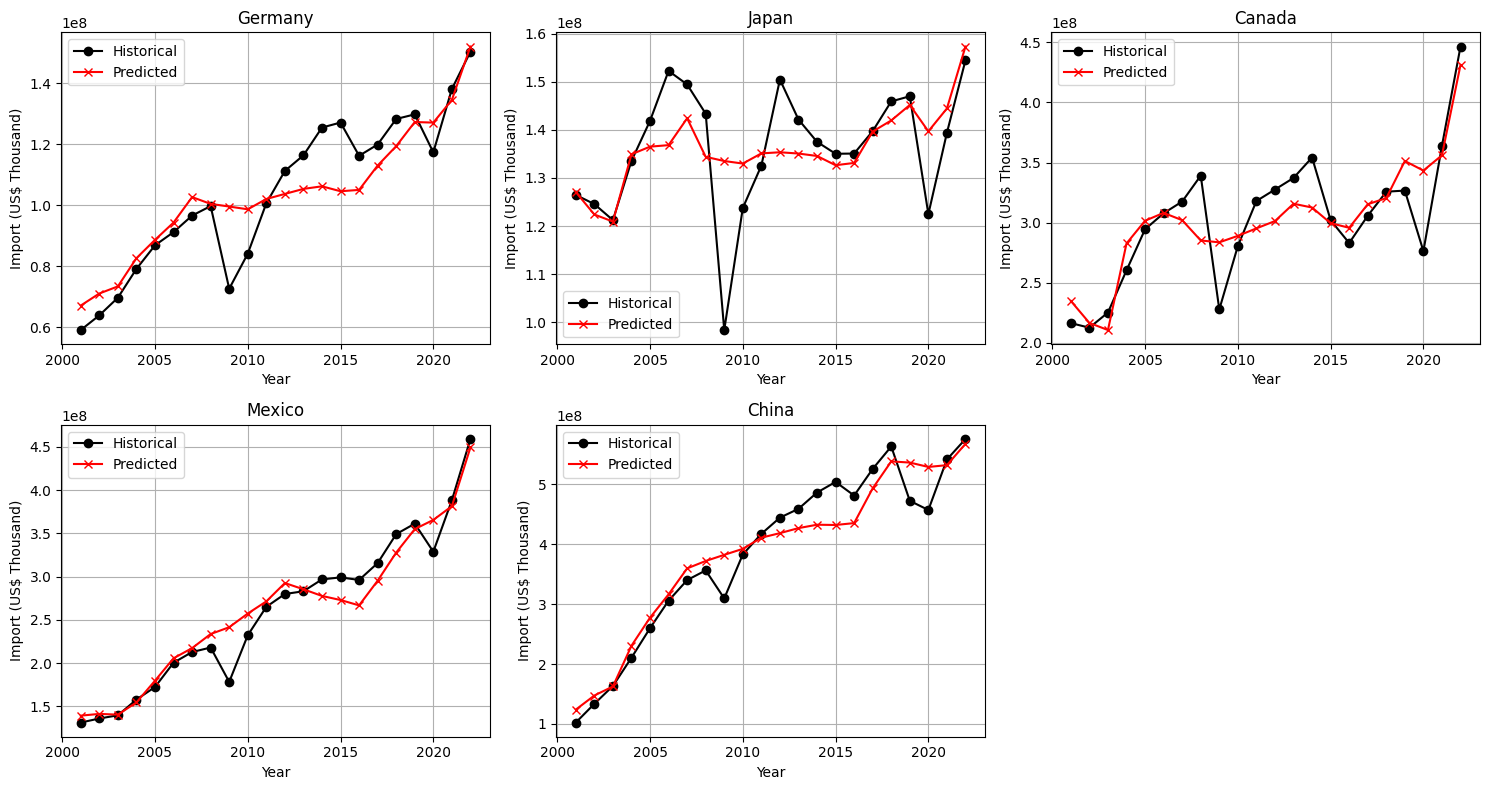

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# -----------------------------
# Parameters
# -----------------------------
top5_countries = ["Germany", "Japan", "Canada", "Mexico", "China"]

# Columns we want to use as predictors (plus 'Lag Import' if desired)
tariff_predictors = [
    "MFN MaxRate (%)",
    "MFN MinRate (%)",
    "MFN Duty Free Tariff Lines Share (%)",
    "MFN Specific Tariff Lines Share (%)",
    "MFN AVE Tariff Lines Share (%)"
]
use_lag_import = True  # Set to False if you do not want to include a lag predictor

# -----------------------------
# Load Data
# -----------------------------

# Filter to "All Products" only (if desired)
all_products_df = main_df[main_df["Product Group"] == "All Products"].copy()

# Create subplots for 5 countries (2 rows x 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(15, 8), sharey=False)
axes = axes.flatten()

# We'll only need 5 subplots; the 6th can remain empty or be turned off
for i, country in enumerate(top5_countries):
    ax = axes[i]

    # -----------------------------
    # Subset for this country
    # -----------------------------
    df_country = all_products_df[all_products_df["Country"] == country].copy()

    # Sort by year and drop rows with missing import values
    df_country = df_country.sort_values("Year").dropna(subset=["Import (US$ Thousand)"])

    # Optionally create a lagged import column
    if use_lag_import:
        df_country["Lag Import"] = df_country["Import (US$ Thousand)"].shift(1)
        df_country = df_country.dropna(subset=["Lag Import"])

    # Define the predictors list (add 'Lag Import' if using it)
    if use_lag_import:
        predictors = tariff_predictors + ["Lag Import"]
    else:
        predictors = tariff_predictors

    # Drop rows missing any predictor
    df_country = df_country.dropna(subset=predictors)

    # -----------------------------
    # Fit the Model
    # -----------------------------
    X = df_country[predictors]
    y = df_country["Import (US$ Thousand)"]

    if len(X) < 2:
        # Not enough data points to train a meaningful model
        ax.set_title(f"{country} (Insufficient Data)")
        continue

    model = LinearRegression()
    model.fit(X, y)

    # -----------------------------
    # In-Sample Simulation
    # -----------------------------
    # We'll predict year by year, recursively updating the lag
    years = df_country["Year"].values
    df_country = df_country.reset_index(drop=True)

    predicted_imports = []
    if use_lag_import:
        # Start with the actual lag from the first row
        current_lag = df_country.loc[0, "Lag Import"]
    else:
        current_lag = None  # Not used if no lag predictor

    for idx in range(len(df_country)):
        row = df_country.loc[idx].copy()

        # If using lag, override the row's 'Lag Import' with the 'current_lag'
        if use_lag_import:
            row["Lag Import"] = current_lag

        # Build the predictor vector
        X_row = row[predictors].values.reshape(1, -1)

        # Predict
        y_pred = model.predict(X_row)[0]
        predicted_imports.append(y_pred)

        # Update lag for next iteration
        if use_lag_import:
            current_lag = y_pred

    df_country["Predicted Import"] = predicted_imports

    # -----------------------------
    # Plot Historical vs. Predicted
    # -----------------------------
    ax.plot(df_country["Year"], df_country["Import (US$ Thousand)"],
            marker='o', color='black', label='Historical')
    ax.plot(df_country["Year"], df_country["Predicted Import"],
            marker='x', color='red', label='Predicted')
    ax.set_title(country)
    ax.set_xlabel("Year")
    ax.set_ylabel("Import (US$ Thousand)")
    ax.grid(True)
    ax.legend()

# Hide the 6th subplot if you only have 5 countries
axes[-1].axis('off')

plt.tight_layout()
plt.show()



=== Germany ===
  Best polynomial degree: 2

=== Japan ===


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist

  Best polynomial degree: 4

=== Canada ===
  Best polynomial degree: 4


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist


=== Mexico ===
  Best polynomial degree: 2

=== China ===


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist

  Best polynomial degree: 2


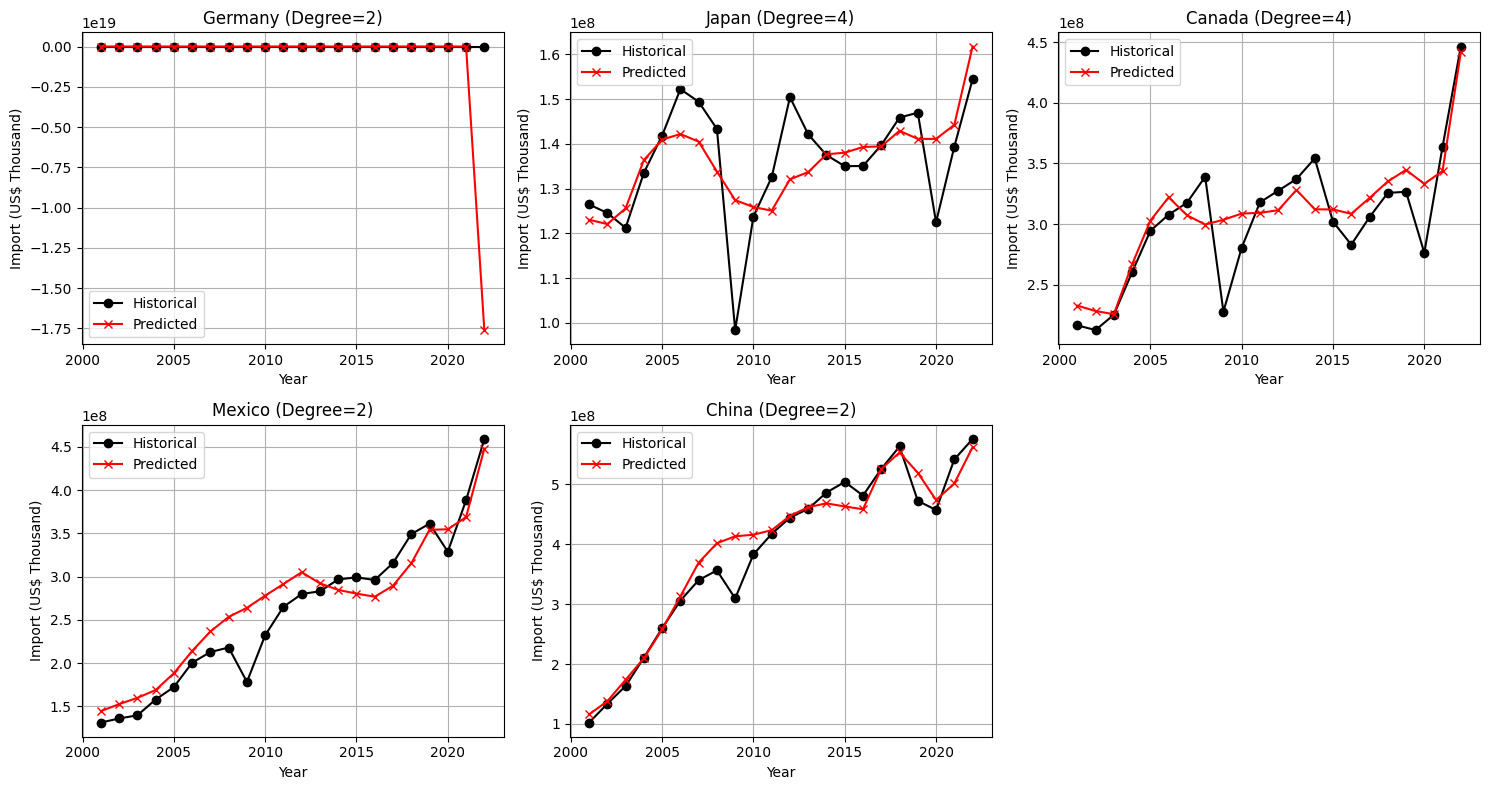

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.pipeline import Pipeline

# -----------------------------
# Helper Functions
# -----------------------------

def prepare_country_data(df, country, predictors, use_lag=True):
    """
    Filters the dataframe for a single country, sorts by year,
    and optionally creates a lagged import column.

    Parameters:
    -----------
    df : pd.DataFrame
        Main dataset containing 'Year', 'Import (US$ Thousand)', and tariff columns.
    country : str
        The partner country's name to filter.
    predictors : list of str
        Columns to be used as predictors (excluding 'Lag Import').
    use_lag : bool
        Whether to include a lagged import predictor.

    Returns:
    --------
    df_country : pd.DataFrame
        Processed dataframe for the given country.
    final_predictors : list of str
        Predictors used in the final model (including 'Lag Import' if requested).
    """
    # Filter data for the specified country
    df_country = df[df["Country"] == country].copy()

    # Sort by Year and drop missing import values
    df_country = df_country.sort_values("Year").dropna(subset=["Import (US$ Thousand)"])

    # Optionally create a lagged import column
    if use_lag:
        df_country["Lag Import"] = df_country["Import (US$ Thousand)"].shift(1)
        df_country = df_country.dropna(subset=["Lag Import"])
        final_predictors = predictors + ["Lag Import"]
    else:
        final_predictors = predictors

    # Drop rows missing any predictor
    df_country = df_country.dropna(subset=final_predictors)

    return df_country, final_predictors


def time_series_cv_train_poly(X, y, degree_options=None, n_splits=3):
    """
    Trains a LinearRegression model with PolynomialFeatures using
    time-series cross-validation and GridSearchCV over different polynomial degrees.

    Parameters:
    -----------
    X : pd.DataFrame
        Predictor matrix.
    y : pd.Series
        Target vector.
    degree_options : list of int
        Polynomial degrees to try (e.g., [1, 2, 3]).
    n_splits : int
        Number of splits for time-series cross-validation.

    Returns:
    --------
    best_model : Pipeline
        The best pipeline (PolynomialFeatures + LinearRegression) found by GridSearchCV.
    best_degree : int
        The degree of the best polynomial transformation.
    """
    if degree_options is None:
        degree_options = [1, 2, 3]  # You can adjust as needed

    # Create a pipeline: PolynomialFeatures -> LinearRegression
    pipeline = Pipeline([
        ("poly", PolynomialFeatures(include_bias=False)),  # degree set via param_grid
        ("linreg", LinearRegression())
    ])

    # Time-series split
    tscv = TimeSeriesSplit(n_splits=n_splits)

    # Parameter grid for polynomial degree
    param_grid = {
        "poly__degree": degree_options
    }

    # Grid search
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        scoring="neg_mean_squared_error",
        cv=tscv
    )

    grid_search.fit(X, y)
    best_model = grid_search.best_estimator_
    best_degree = grid_search.best_params_["poly__degree"]
    print(f"  Best polynomial degree: {best_degree}")
    return best_model, best_degree


def in_sample_simulation(df_country, model, predictors, use_lag=True):
    """
    Performs an in-sample simulation (recursive prediction) to compare
    predicted imports with historical data.

    Parameters:
    -----------
    df_country : pd.DataFrame
        Country-specific data sorted by Year, containing columns for
        'Import (US$ Thousand)' and the predictor columns.
    model : Pipeline
        A trained pipeline with PolynomialFeatures + LinearRegression.
    predictors : list of str
        Column names to use for prediction (including 'Lag Import' if used).
    use_lag : bool
        Whether the model expects a lagged import predictor.

    Returns:
    --------
    df_country : pd.DataFrame
        Same dataframe but with an additional 'Predicted Import' column
        containing in-sample simulated predictions.
    """
    df_country = df_country.reset_index(drop=True)

    predicted_imports = []

    # Initialize the lag with the actual first row's "Lag Import" if using lag
    if use_lag:
        current_lag = df_country.loc[0, "Lag Import"]
    else:
        current_lag = None

    for i in range(len(df_country)):
        row = df_country.loc[i].copy()

        # Overwrite 'Lag Import' with our predicted lag if using recursion
        if use_lag:
            row["Lag Import"] = current_lag

        # Build the predictor vector
        X_row = row[predictors].values.reshape(1, -1)

        # Predict
        y_pred = model.predict(X_row)[0]
        predicted_imports.append(y_pred)

        # Update lag for the next iteration
        if use_lag:
            current_lag = y_pred

    df_country["Predicted Import"] = predicted_imports
    return df_country


def plot_country(ax, df_country, country):
    """
    Plots historical vs. predicted imports for a single country on a given axis.

    Parameters:
    -----------
    ax : matplotlib.axes.Axes
        The axis object to plot on.
    df_country : pd.DataFrame
        Dataframe with columns 'Year', 'Import (US$ Thousand)', 'Predicted Import'.
    country : str
        Name of the country for labeling.
    """
    ax.plot(df_country["Year"], df_country["Import (US$ Thousand)"],
            marker='o', color='black', label='Historical')
    ax.plot(df_country["Year"], df_country["Predicted Import"],
            marker='x', color='red', label='Predicted')
    ax.set_title(country)
    ax.set_xlabel("Year")
    ax.set_ylabel("Import (US$ Thousand)")
    ax.grid(True)
    ax.legend()

# -----------------------------
# Main Workflow
# -----------------------------
if __name__ == "__main__":

    # Filter for "All Products" if you only want aggregated product data
    all_products_df = main_df[main_df["Product Group"] == "All Products"].copy()

    # Define your top 5 countries (example)
    top5_countries = ["Germany", "Japan", "Canada", "Mexico", "China"]

    # Columns we want to use as predictors (excluding lag for now)
    tariff_predictors = [
        "MFN MaxRate (%)",
        "MFN MinRate (%)",
        "MFN Duty Free Tariff Lines Share (%)",
        "MFN Specific Tariff Lines Share (%)",
        "MFN AVE Tariff Lines Share (%)"
    ]
    use_lag_import = True  # Decide if you want to include the lag feature

    # Create subplots for 5 countries (2 rows x 3 columns)
    fig, axes = plt.subplots(2, 3, figsize=(15, 8), sharey=False)
    axes = axes.flatten()

    # We'll only use 5 subplots; the 6th is extra
    for i, country in enumerate(top5_countries):
        ax = axes[i]

        print(f"\n=== {country} ===")
        # 1) Prepare the data
        df_country, final_predictors = prepare_country_data(
            all_products_df,
            country,
            tariff_predictors,
            use_lag=use_lag_import
        )

        # If there's not enough data to train, skip
        if len(df_country) < 2:
            ax.set_title(f"{country} (Insufficient Data)")
            ax.axis('off')
            continue

        # 2) Separate X, y
        X = df_country[final_predictors]
        y = df_country["Import (US$ Thousand)"]

        # 3) Train model with polynomial features + linear regression
        #    using time-series cross-validation
        best_model, best_degree = time_series_cv_train_poly(X, y, degree_options=[2, 3, 4], n_splits=3)

        # 4) In-sample simulation
        df_country_sim = in_sample_simulation(df_country, best_model, final_predictors, use_lag=use_lag_import)

        # 5) Plot
        plot_country(ax, df_country_sim, country)
        ax.set_title(f"{country} (Degree={best_degree})")

    # Hide the extra subplot
    axes[-1].axis('off')

    plt.tight_layout()
    plt.show()



=== Germany ===
  Best polynomial degree: 3

=== Japan ===
  Best polynomial degree: 2

=== China ===
  Best polynomial degree: 2

=== Canada ===
  Best polynomial degree: 2

=== Mexico ===
  Best polynomial degree: 2


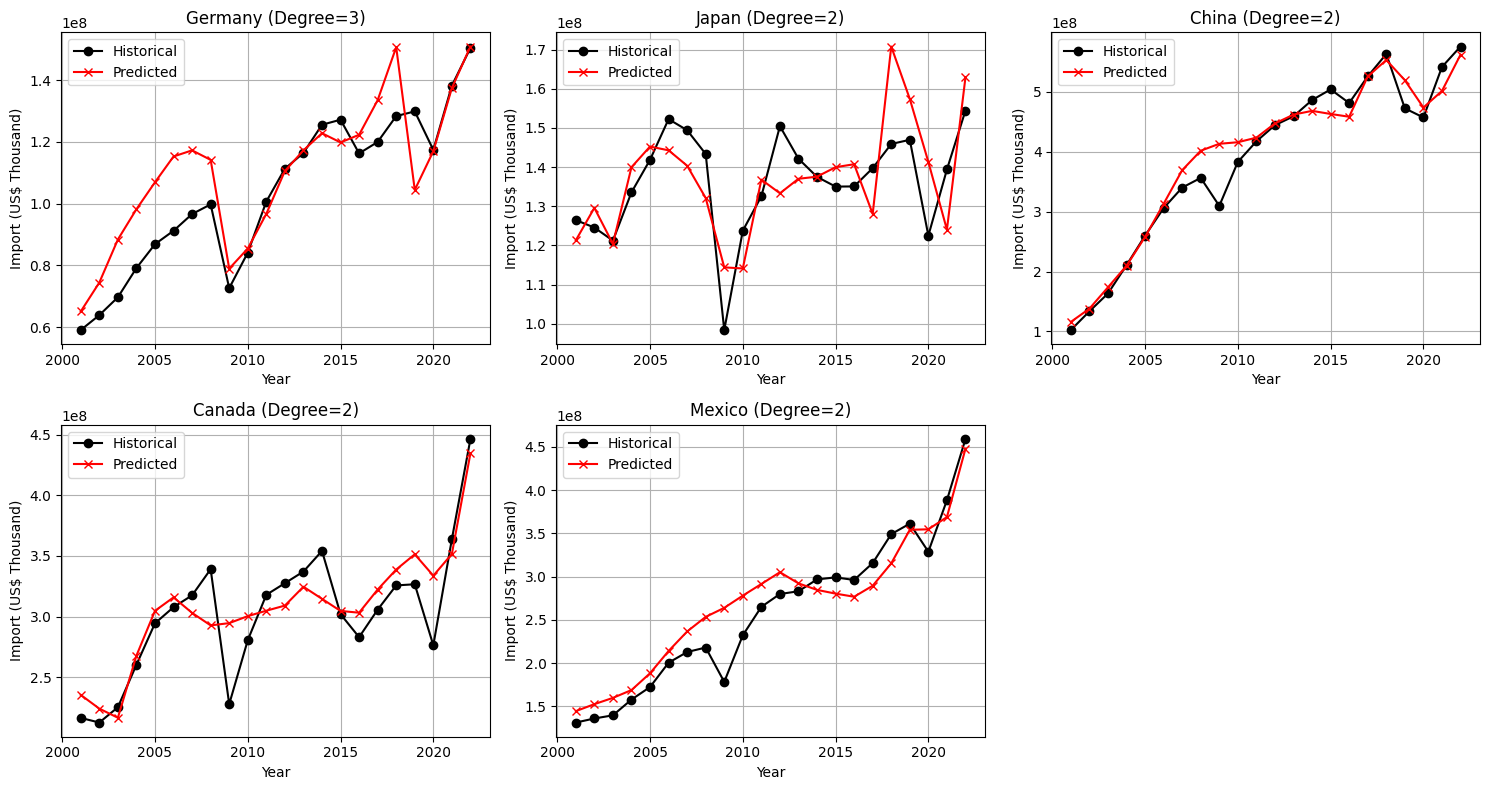

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.pipeline import Pipeline

country_models = []

# -----------------------------
# Helper Functions
# -----------------------------

def prepare_country_data(df, country, predictors, use_lag=True):
    """
    Filters the dataframe for a single country, sorts by year,
    and optionally creates a lagged import column.

    Parameters:
    -----------
    df : pd.DataFrame
        Main dataset containing 'Year', 'Import (US$ Thousand)', and tariff columns.
    country : str
        The partner country's name to filter.
    predictors : list of str
        Columns to be used as predictors (excluding 'Lag Import').
    use_lag : bool
        Whether to include a lagged import predictor.

    Returns:
    --------
    df_country : pd.DataFrame
        Processed dataframe for the given country.
    final_predictors : list of str
        Predictors used in the final model (including 'Lag Import' if requested).
    """
    # Filter data for the specified country
    df_country = df[df["Country"] == country].copy()

    # Sort by Year and drop missing import values
    df_country = df_country.sort_values("Year").dropna(subset=["Import (US$ Thousand)"])

    # Optionally create a lagged import column
    if use_lag:
        df_country["Lag Import"] = df_country["Import (US$ Thousand)"].shift(1)
        df_country = df_country.dropna(subset=["Lag Import"])
        final_predictors = predictors + ["Lag Import"]
    else:
        final_predictors = predictors

    # Drop rows missing any predictor
    df_country = df_country.dropna(subset=final_predictors)

    return df_country, final_predictors


def time_series_cv_train_poly(X, y, degree_options=None, n_splits=3):
    """
    Trains a LinearRegression model with PolynomialFeatures using
    time-series cross-validation and GridSearchCV over different polynomial degrees.

    Parameters:
    -----------
    X : pd.DataFrame
        Predictor matrix.
    y : pd.Series
        Target vector.
    degree_options : list of int
        Polynomial degrees to try (e.g., [1, 2, 3]).
    n_splits : int
        Number of splits for time-series cross-validation.

    Returns:
    --------
    best_model : Pipeline
        The best pipeline (PolynomialFeatures + LinearRegression) found by GridSearchCV.
    best_degree : int
        The degree of the best polynomial transformation.
    """
    if degree_options is None:
        degree_options = [1, 2, 3]  # You can adjust as needed

    # Create a pipeline: PolynomialFeatures -> LinearRegression
    pipeline = Pipeline([
        ("poly", PolynomialFeatures(include_bias=False)),  # degree set via param_grid
        ("linreg", LinearRegression())
    ])

    # Time-series split
    tscv = TimeSeriesSplit(n_splits=n_splits)

    # Parameter grid for polynomial degree
    param_grid = {
        "poly__degree": degree_options
    }

    # Grid search
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        scoring="neg_mean_squared_error",
        cv=tscv
    )

    grid_search.fit(X, y)
    best_model = grid_search.best_estimator_
    best_degree = grid_search.best_params_["poly__degree"]
    print(f"  Best polynomial degree: {best_degree}")
    return best_model, best_degree


def in_sample_simulation(df_country, model, predictors, use_lag=True):
    """
    Performs an in-sample simulation (recursive prediction) to compare
    predicted imports with historical data.

    During prediction, we create a 1-row DataFrame with the same columns
    as X had at training time, ensuring that PolynomialFeatures sees valid names.
    """
    df_country = df_country.reset_index(drop=True)

    predicted_imports = []

    # Initialize the lag with the actual first row's "Lag Import" if using lag
    if use_lag:
        current_lag = df_country.loc[0, "Lag Import"]
    else:
        current_lag = None

    for i in range(len(df_country)):
        row = df_country.loc[i].copy()

        # Overwrite 'Lag Import' with our predicted lag if using recursion
        if use_lag:
            row["Lag Import"] = current_lag

        # Build the predictor vector
        # Instead of converting to a NumPy array directly,
        # we create a DataFrame with the same columns in the same order.
        X_row_df = pd.DataFrame([row[predictors].values], columns=predictors)

        # Predict
        y_pred = model.predict(X_row_df)[0]
        predicted_imports.append(y_pred)

        # Update lag for the next iteration
        if use_lag:
            current_lag = y_pred

    df_country["Predicted Import"] = predicted_imports
    return df_country


def plot_country(ax, df_country, country):
    """
    Plots historical vs. predicted imports for a single country on a given axis.
    """
    ax.plot(df_country["Year"], df_country["Import (US$ Thousand)"],
            marker='o', color='black', label='Historical')
    ax.plot(df_country["Year"], df_country["Predicted Import"],
            marker='x', color='red', label='Predicted')
    ax.set_title(country)
    ax.set_xlabel("Year")
    ax.set_ylabel("Import (US$ Thousand)")
    ax.grid(True)
    ax.legend()


# -----------------------------
# Main Workflow
# -----------------------------

country_models = {}

# Filter for "All Products" if you only want aggregated product data
all_products_df = main_df[main_df["Product Group"] == "All Products"].copy()

# Define your top 5 countries (example)
top5_countries = ["Germany", "Japan", "China", "Canada", "Mexico"]

# Columns we want to use as predictors (excluding lag for now)
tariff_predictors = [
    "MFN MaxRate (%)",
    "MFN MinRate (%)",
    "MFN Duty Free Tariff Lines Share (%)",
    "MFN Specific Tariff Lines Share (%)",
    "MFN AVE Tariff Lines Share (%)"
]
use_lag_import = True  # Decide if you want to include the lag feature

# Create subplots for 5 countries (2 rows x 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(15, 8), sharey=False)
axes = axes.flatten()

for i, country in enumerate(top5_countries):
    ax = axes[i]

    print(f"\n=== {country} ===")
    # 1) Prepare the data
    df_country, final_predictors = prepare_country_data(
        all_products_df,
        country,
        tariff_predictors,
        use_lag=use_lag_import
    )

    # If there's not enough data to train, skip
    if len(df_country) < 2:
        ax.set_title(f"{country} (Insufficient Data)")
        ax.axis('off')
        continue

    # 2) Separate X, y
    X = df_country[final_predictors]
    y = df_country["Import (US$ Thousand)"]

    # 3) Train model with polynomial features + linear regression
    #    using time-series cross-validation
    best_model, best_degree = time_series_cv_train_poly(X, y, degree_options=[2, 3], n_splits=4)
    country_models[country] = best_model

    # 4) In-sample simulation
    df_country_sim = in_sample_simulation(df_country, best_model, final_predictors, use_lag=use_lag_import)

    # 5) Plot
    plot_country(ax, df_country_sim, country)
    ax.set_title(f"{country} (Degree={best_degree})")

# Hide the extra subplot
axes[-1].axis('off')

plt.tight_layout()
plt.show()


# Forecasting

In [97]:
new_tariff_scenario = {
    "China": {
        "MFN MaxRate (%)": 35,
        "MFN MinRate (%)": 5,
        "MFN Duty Free Tariff Lines Share (%)": 5,
        "MFN Specific Tariff Lines Share (%)": 2,
        "MFN AVE Tariff Lines Share (%)": 93
    },
    "Canada": {
        "MFN MaxRate (%)": 25,
        "MFN MinRate (%)": 10,
        "MFN Duty Free Tariff Lines Share (%)": 10,
        "MFN Specific Tariff Lines Share (%)": 3,
        "MFN AVE Tariff Lines Share (%)": 87
    },
    "Mexico": {
        "MFN MaxRate (%)": 25,
        "MFN MinRate (%)": 0,
        "MFN Duty Free Tariff Lines Share (%)": 10,
        "MFN Specific Tariff Lines Share (%)": 3,
        "MFN AVE Tariff Lines Share (%)": 87
    },
    "Japan": {
        "MFN MaxRate (%)": 25,  # Proposed
        "MFN MinRate (%)": 0,
        "MFN Duty Free Tariff Lines Share (%)": 20,
        "MFN Specific Tariff Lines Share (%)": 2,
        "MFN AVE Tariff Lines Share (%)": 78
    },
    "Germany": {
        "MFN MaxRate (%)": 25,  # Proposed
        "MFN MinRate (%)": 0,
        "MFN Duty Free Tariff Lines Share (%)": 15,
        "MFN Specific Tariff Lines Share (%)": 2,
        "MFN AVE Tariff Lines Share (%)": 83
    }
}


In [131]:
def forecast_future_years(
    df_country,
    model,
    predictors,
    future_years=6,
    use_lag=True,
    scenario_rates=None
):
    """
    Forecast the next 'future_years' years beyond the last historical year
    using the given model (PolynomialFeatures + LinearRegression, or similar)
    and a recursive approach if a lagged import predictor is used.

    Parameters
    ----------
    df_country : pd.DataFrame
        Historical data for the specific country, already processed by
        in_sample_simulation so that the last row has a predicted import.
    model : trained estimator
        A pipeline or regression model with .predict().
    predictors : list of str
        The predictor column names (including 'Lag Import' if use_lag=True).
    future_years : int
        Number of future years to forecast.
    use_lag : bool
        If True, each future year's "Lag Import" is set to the last predicted import.
    scenario_rates : dict, optional
        A dictionary specifying new tariff values for future years. For example:
        {
            "MFN MaxRate (%)": 25,
            "MFN MinRate (%)": 10,
            ...
        }
        If provided, these values override the last row's corresponding columns
        for each forecasted year. If None, the last known tariff values remain constant.

    Returns
    -------
    df_forecast : pd.DataFrame
        DataFrame containing:
          - 'Year'
          - 'Predicted Import'
        for each forecasted future year.
    """
    # We'll base everything on the final row of df_country
    last_row = df_country.iloc[-1].copy()
    last_year = int(last_row["Year"])

    # Initialize the lag from the last predicted or actual import
    if use_lag and "Predicted Import" in df_country.columns:
        current_lag = df_country.iloc[-1]["Predicted Import"]
    elif use_lag:
        current_lag = df_country.iloc[-1]["Import (US$ Thousand)"]
    else:
        current_lag = None

    forecast_data = []

    # If we're using a lag, we remove 'Lag Import' from the last row's baseline
    # so we can set it explicitly each iteration.
    baseline_values = last_row[predictors].drop(labels="Lag Import", errors="ignore") \
        if use_lag else last_row[predictors]

    for i in range(1, future_years + 1):
        new_year = last_year + i

        # Copy the baseline predictor values
        future_row = baseline_values.copy()

        # Override with scenario rates if provided
        if scenario_rates is not None:
            for col_name, val in scenario_rates.items():
                if col_name in future_row.index:
                    future_row[col_name] = val

        # If using a lag, set it to the last predicted import
        if use_lag:
            future_row["Lag Import"] = current_lag

        # Build a 1-row DataFrame for prediction
        X_row_df = pd.DataFrame([future_row[predictors].values], columns=predictors)
        predicted_import = model.predict(X_row_df)[0]

        # Update the lag for the next iteration
        if use_lag:
            current_lag = predicted_import

        forecast_data.append({
            "Year": new_year,
            "Predicted Import": predicted_import
        })

    df_forecast = pd.DataFrame(forecast_data)
    return df_forecast

In [132]:
import_results = {}   # Dictionary to store import data for each country
future_years = 6

for country, model in country_models.items():
    # 1) Prepare the data & run in-sample simulation
    df_country, final_predictors = prepare_country_data(
        all_products_df,
        country,
        tariff_predictors,
        use_lag=use_lag_import
    )
    df_country_sim = in_sample_simulation(df_country, model, final_predictors, use_lag=use_lag_import)

    # 2) Retrieve scenario rates if available
    scenario_rates = new_tariff_scenario.get(country, None)

    # 3) Forecast future with the updated function
    df_forecast = forecast_future_years(
        df_country_sim,
        model,
        final_predictors,
        future_years=future_years,
        use_lag=use_lag_import,
        scenario_rates=scenario_rates
    )

    # 4) Store both the in-sample simulation and forecast in import_results
    import_results[country] = {
        "df_sim": df_country_sim,      # Historical data with 'Predicted Import'
        "df_forecast": df_forecast     # Future data with 'Predicted Import'
    }

    # 5) (Optional) Print the forecast for debugging or inspection
    print(f"\nImport Forecast for {country} under new tariffs, next {future_years} years:")
    print(df_forecast)



Import Forecast for Germany under new tariffs, next 6 years:
   Year  Predicted Import
0  2023      1.081177e+09
1  2024     -1.386804e+11
2  2025      4.756259e+17
3  2026     -1.913033e+37
4  2027      1.244781e+96
5  2028    -3.429297e+272

Import Forecast for Japan under new tariffs, next 6 years:
   Year  Predicted Import
0  2023     -1.744641e+09
1  2024      5.035041e+10
2  2025      2.026647e+13
3  2026      3.399077e+18
4  2027      9.562324e+28
5  2028      7.567780e+49

Import Forecast for China under new tariffs, next 6 years:
   Year  Predicted Import
0  2023      2.871614e+09
1  2024      3.989986e+09
2  2025     -1.744375e+09
3  2026     -1.567341e+10
4  2027     -4.978741e+11
5  2028     -4.088218e+14

Import Forecast for Canada under new tariffs, next 6 years:
   Year  Predicted Import
0  2023     -2.365187e+09
1  2024     -2.082766e+10
2  2025     -2.083093e+12
3  2026     -2.144415e+16
4  2027     -2.273180e+24
5  2028     -2.554369e+40

Import Forecast for Mexico u

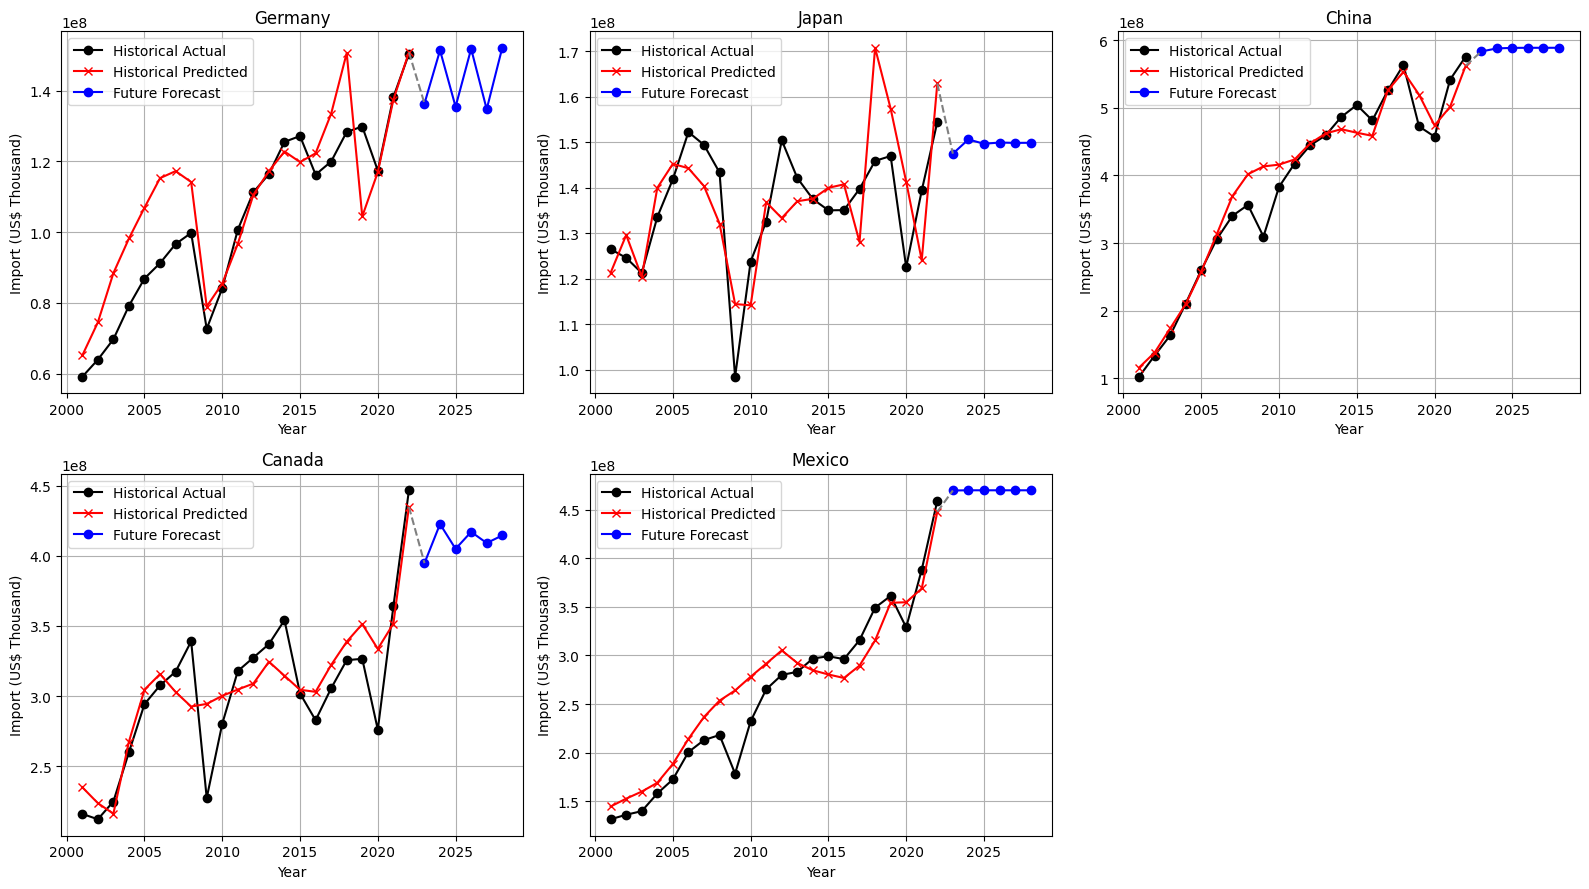

In [133]:
def plot_forecast(ax, df_country_sim, df_forecast, country):
    # Historical actual
    ax.plot(df_country_sim["Year"], df_country_sim["Import (US$ Thousand)"],
            marker='o', color='black', label='Historical Actual')

    # Historical predicted
    ax.plot(df_country_sim["Year"], df_country_sim["Predicted Import"],
            marker='x', color='red', label='Historical Predicted')

    # Future forecast
    if df_forecast is not None and len(df_forecast) > 0:
        ax.plot(df_forecast["Year"], df_forecast["Predicted Import"],
                marker='o', color='blue', label='Future Forecast')
        ax.plot([df_country_sim.iloc[-1]["Year"], df_forecast.iloc[0]["Year"]],
                [df_country_sim.iloc[-1]["Predicted Import"], df_forecast.iloc[0]["Predicted Import"]],
                linestyle='--', color='gray')

    ax.set_title(country)
    ax.set_xlabel("Year")
    ax.set_ylabel("Import (US$ Thousand)")
    ax.grid(True)
    ax.legend()

# Example usage in a multi-plot setup
fig, axes = plt.subplots(2, 3, figsize=(16, 9))
axes = axes.flatten()

for i, (country, model) in enumerate(country_models.items()):
    ax = axes[i]
    # Re-prepare and simulate
    df_country, final_predictors = prepare_country_data(
        all_products_df,
        country,
        tariff_predictors,
        use_lag=use_lag_import
    )
    df_country_sim = in_sample_simulation(df_country, model, final_predictors, use_lag=use_lag_import)
    df_forecast = forecast_future_years(df_country_sim, model, final_predictors, future_years=6, use_lag=use_lag_import, scenario_rates=new_tariff_scenario)

    plot_forecast(ax, df_country_sim, df_forecast, country)

# Hide extra subplot if you have only 5 countries
axes[-1].axis('off')
plt.tight_layout()
plt.show()

# Retaliatory Tariff Simulations

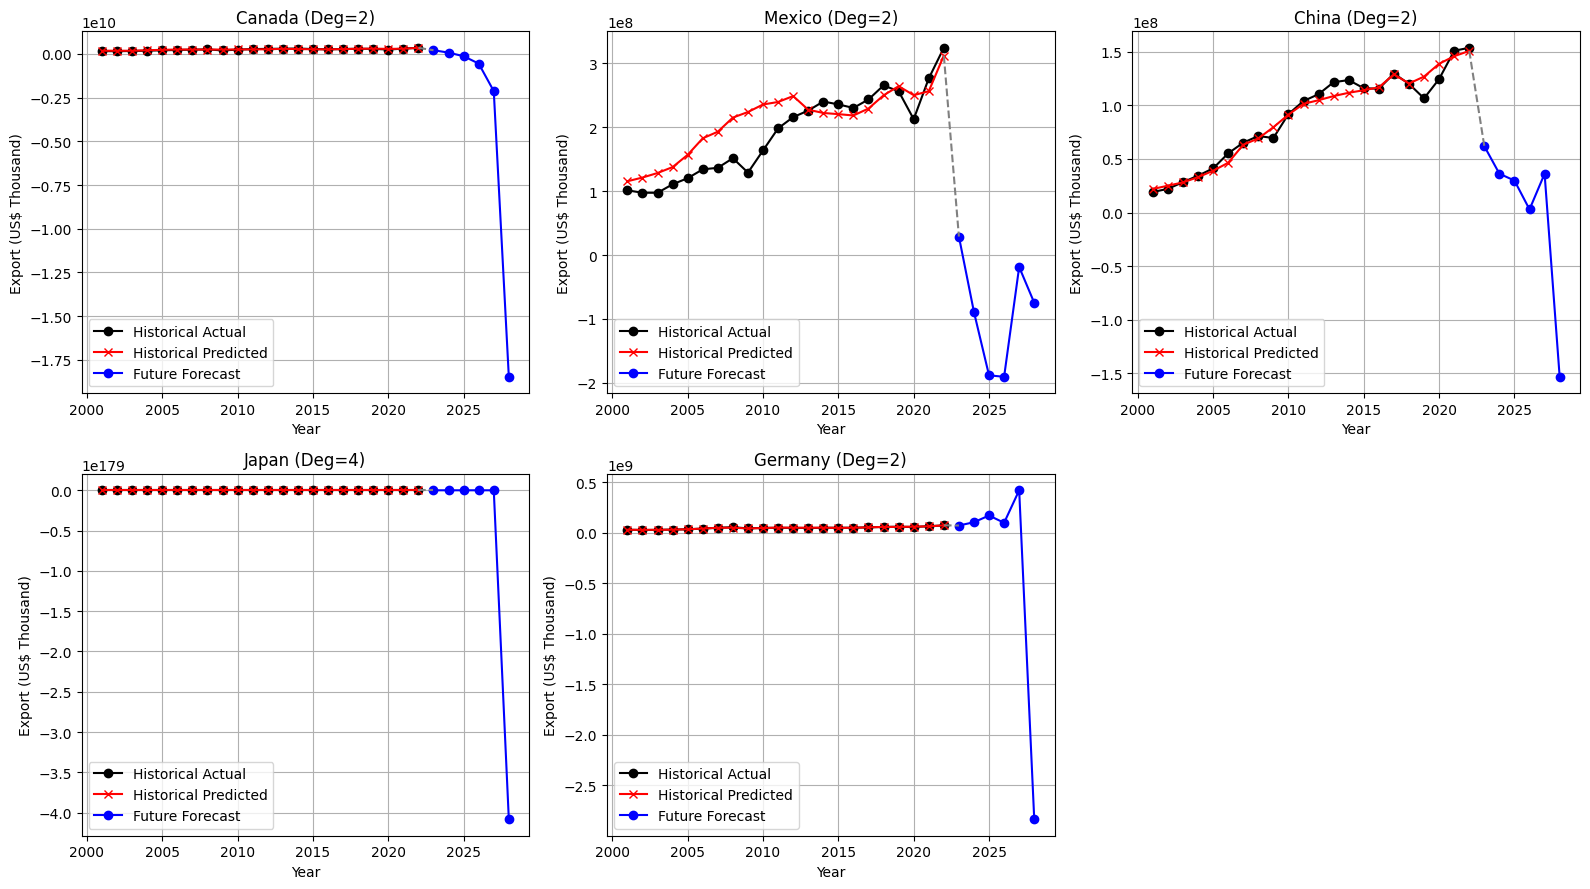

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.pipeline import Pipeline

# --------------------------------------------------------------------------
# 1) Load & Filter the Dataset
# --------------------------------------------------------------------------

# We'll assume 'main_df' is already loaded above, e.g.:
# main_df = pd.read_csv('/path/to/main.csv')

# Filter for "All Products" if you want an aggregate of all product groups
all_products_df = main_df[main_df["Product Group"] == "All Products"].copy()

# Top countries for which we'll model U.S. exports
top_countries = ["Canada", "Mexico", "China", "Japan", "Germany"]

# Hypothetical retaliatory measures from each partner on U.S. exports
retaliatory_scenario = {
    "Canada": {
        "MFN MaxRate (%)": 25,
        "MFN MinRate (%)": 0,
        "MFN Duty Free Tariff Lines Share (%)": 5,
        "MFN Specific Tariff Lines Share (%)": 2,
        "MFN AVE Tariff Lines Share (%)": 93
    },
    "Mexico": {
        "MFN MaxRate (%)": 25,
        "MFN MinRate (%)": 0,
        "MFN Duty Free Tariff Lines Share (%)": 10,
        "MFN Specific Tariff Lines Share (%)": 5,
        "MFN AVE Tariff Lines Share (%)": 85
    },
    "China": {
        "MFN MaxRate (%)": 15,
        "MFN MinRate (%)": 5,
        "MFN Duty Free Tariff Lines Share (%)": 3,
        "MFN Specific Tariff Lines Share (%)": 2,
        "MFN AVE Tariff Lines Share (%)": 95
    },
    "Japan": {
        "MFN MaxRate (%)": 25,
        "MFN MinRate (%)": 0,
        "MFN Duty Free Tariff Lines Share (%)": 15,
        "MFN Specific Tariff Lines Share (%)": 3,
        "MFN AVE Tariff Lines Share (%)": 82
    },
    "Germany": {
        "MFN MaxRate (%)": 25,
        "MFN MinRate (%)": 0,
        "MFN Duty Free Tariff Lines Share (%)": 20,
        "MFN Specific Tariff Lines Share (%)": 2,
        "MFN AVE Tariff Lines Share (%)": 78
    }
}

# Define the columns we use as predictors (these are the partner's MFN columns)
# plus a potential 'Lag Export' if you want last year's export as a predictor.
export_predictors = [
    "MFN MaxRate (%)",
    "MFN MinRate (%)",
    "MFN Duty Free Tariff Lines Share (%)",
    "MFN Specific Tariff Lines Share (%)",
    "MFN AVE Tariff Lines Share (%)"
]
use_lag_export = True  # Decide if you want to include a lagged export predictor

# --------------------------------------------------------------------------
# 2) Helper Functions
# --------------------------------------------------------------------------

def prepare_country_data_for_exports(df, country, predictors, use_lag=True):
    df_country = df[df["Country"] == country].copy()

    # Sort by Year and drop missing export values
    df_country = df_country.sort_values("Year").dropna(subset=["Export (US$ Thousand)"])

    # Optionally create a lagged export column
    if use_lag:
        df_country["Lag Export"] = df_country["Export (US$ Thousand)"].shift(1)
        df_country = df_country.dropna(subset=["Lag Export"])
        final_predictors = predictors + ["Lag Export"]
    else:
        final_predictors = predictors

    # Drop rows missing any predictor
    df_country = df_country.dropna(subset=final_predictors)

    return df_country, final_predictors


def time_series_cv_train_poly(X, y, degree_options=None, n_splits=3):
    if degree_options is None:
        degree_options = [1, 2, 3, 4]

    pipeline = Pipeline([
        ("poly", PolynomialFeatures(include_bias=False)),
        ("linreg", LinearRegression())
    ])

    tscv = TimeSeriesSplit(n_splits=n_splits)

    param_grid = {
        "poly__degree": degree_options
    }

    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        scoring="neg_mean_squared_error",
        cv=tscv
    )

    grid_search.fit(X, y)
    best_model = grid_search.best_estimator_
    best_degree = grid_search.best_params_["poly__degree"]
    return best_model, best_degree


def in_sample_simulation_exports(df_country, model, predictors, use_lag=True):
    df_country = df_country.reset_index(drop=True)
    predicted_exports = []

    if use_lag and "Lag Export" in df_country.columns:
        current_lag = df_country.loc[0, "Lag Export"]
    else:
        current_lag = None

    for i in range(len(df_country)):
        row = df_country.loc[i].copy()
        if use_lag and "Lag Export" in row.index:
            row["Lag Export"] = current_lag

        X_row_df = pd.DataFrame([row[predictors].values], columns=predictors)
        y_pred = model.predict(X_row_df)[0]
        predicted_exports.append(y_pred)

        if use_lag:
            current_lag = y_pred

    df_country["Predicted Export"] = predicted_exports
    return df_country


def forecast_future_years_exports(
    df_country,
    model,
    predictors,
    future_years=6,
    use_lag=True,
    scenario_rates=None,
    phased_tariff=False
):
    """
    Forecast the next 'future_years' years for exports,
    optionally overriding tariff columns with a scenario.

    If 'phased_tariff=True', we gradually phase in the new tariff rates
    over the forecast horizon (a simple linear interpolation approach).
    """
    last_row = df_country.iloc[-1].copy()
    last_year = int(last_row["Year"])

    if use_lag and "Predicted Export" in df_country.columns:
        current_lag = df_country.iloc[-1]["Predicted Export"]
    elif use_lag:
        current_lag = df_country.iloc[-1]["Export (US$ Thousand)"]
    else:
        current_lag = None

    forecast_data = []

    # Baseline predictor values from the last row
    baseline_values = last_row[predictors].drop(labels="Lag Export", errors="ignore") \
        if use_lag else last_row[predictors]

    for i in range(1, future_years + 1):
        new_year = last_year + i
        future_row = baseline_values.copy()

        if scenario_rates is not None:
            # If phased_tariff=True, gradually interpolate from baseline to scenario
            if phased_tariff:
                step_fraction = i / future_years
                for col_name, val in scenario_rates.items():
                    if col_name in future_row.index:
                        old_val = future_row[col_name]
                        future_row[col_name] = old_val + (val - old_val) * step_fraction
            else:
                # Immediate override
                for col_name, val in scenario_rates.items():
                    if col_name in future_row.index:
                        future_row[col_name] = val

        if use_lag:
            future_row["Lag Export"] = current_lag

        X_row_df = pd.DataFrame([future_row[predictors].values], columns=predictors)
        predicted_val = model.predict(X_row_df)[0]

        if use_lag:
            current_lag = predicted_val

        forecast_data.append({
            "Year": new_year,
            "Predicted Export": predicted_val
        })

    df_forecast = pd.DataFrame(forecast_data)
    return df_forecast


def plot_export_forecast(ax, df_country_sim, df_forecast, country):
    ax.plot(df_country_sim["Year"], df_country_sim["Export (US$ Thousand)"],
            marker='o', color='black', label='Historical Actual')

    ax.plot(df_country_sim["Year"], df_country_sim["Predicted Export"],
            marker='x', color='red', label='Historical Predicted')

    if df_forecast is not None and len(df_forecast) > 0:
        ax.plot(df_forecast["Year"], df_forecast["Predicted Export"],
                marker='o', color='blue', label='Future Forecast')
        ax.plot([df_country_sim.iloc[-1]["Year"], df_forecast.iloc[0]["Year"]],
                [df_country_sim.iloc[-1]["Predicted Export"], df_forecast.iloc[0]["Predicted Export"]],
                linestyle='--', color='gray')

    ax.set_title(country)
    ax.set_xlabel("Year")
    ax.set_ylabel("Export (US$ Thousand)")
    ax.grid(True)
    ax.legend()


def plot_residuals(ax, df_country_sim, country):
    df_country_sim["Residual"] = df_country_sim["Export (US$ Thousand)"] - df_country_sim["Predicted Export"]
    ax.plot(df_country_sim["Year"], df_country_sim["Residual"], marker='o', color='purple')
    ax.axhline(0, color='black', linestyle='--', linewidth=1)
    ax.set_title(f"{country} - Residuals")
    ax.set_xlabel("Year")
    ax.set_ylabel("Residual (US$ Thousand)")
    ax.grid(True)

# --------------------------------------------------------------------------
# 3) Main Workflow
# --------------------------------------------------------------------------

export_models = {}
export_results = {}   # Dictionary to store export data for each country
n_future_years = 6

# Create subplots for the main forecast
fig, axes = plt.subplots(2, 3, figsize=(16, 9))
axes = axes.flatten()

for i, country in enumerate(top_countries):
    ax = axes[i]

    # 1) Prepare data for exports
    df_country, final_predictors = prepare_country_data_for_exports(
        all_products_df,
        country,
        export_predictors,
        use_lag=use_lag_export
    )

    # If insufficient data, skip
    if len(df_country) < 2:
        ax.set_title(f"{country} (Insufficient Data)")
        ax.axis('off')
        continue

    # 2) Separate X, y
    X = df_country[final_predictors]
    y = df_country["Export (US$ Thousand)"]

    # 3) Train polynomial model with time-series CV
    best_model, best_degree = time_series_cv_train_poly(
        X,
        y,
        degree_options=[2, 3, 4],
        n_splits=3
    )
    export_models[country] = best_model

    # 4) In-sample simulation
    df_country_sim = in_sample_simulation_exports(df_country, best_model, final_predictors, use_lag=use_lag_export)

    # 5) Retrieve the retaliatory rates for this country
    scenario_rates = retaliatory_scenario.get(country, None)

    # 6) Forecast future exports
    df_forecast = forecast_future_years_exports(
        df_country_sim,
        best_model,
        final_predictors,
        future_years=n_future_years,
        use_lag=use_lag_export,
        scenario_rates=scenario_rates,
        phased_tariff=True  # set to False for an immediate jump
    )

    # 7) Store the in-sample + forecast results
    export_results[country] = {
        "df_sim": df_country_sim,      # Historical data with 'Predicted Export'
        "df_forecast": df_forecast     # Future data with 'Predicted Export'
    }

    # 8) Plot the forecast
    plot_export_forecast(ax, df_country_sim, df_forecast, f"{country} (Deg={best_degree})")

# Hide extra subplot if you only have 5 countries
axes[-1].axis('off')
plt.tight_layout()
plt.show()


# Forecasting Results

In [146]:
def combine_import_export_forecasts(import_data, export_data):
    """
    Combine historical and forecast data for imports and exports,
    then compute the trade balance (Exports - Imports).

    Parameters
    ----------
    import_data : dict
        A dictionary with keys "df_sim" and "df_forecast", each a DataFrame.
        - df_sim: in-sample results with "Year", "Import (US$ Thousand)", "Predicted Import"
        - df_forecast: future forecast with "Year", "Predicted Import"

    export_data : dict
        Similar structure for exports:
        - df_sim: in-sample results with "Year", "Export (US$ Thousand)", "Predicted Export"
        - df_forecast: future forecast with "Year", "Predicted Export"

    Returns
    -------
    df_balance : pd.DataFrame
        A merged DataFrame containing columns for:
        - "Year"
        - "Import (Historical)", "Import (Predicted)", "Import (Forecast)"
        - "Export (Historical)", "Export (Predicted)", "Export (Forecast)"
        - "Trade Balance (Historical)" = Export(Hist) - Import(Hist)
        - "Trade Balance (Predicted)"  = Export(Pred) - Import(Pred)
        - "Trade Balance (Forecast)"   = Export(Forecast) - Import(Forecast)
    """

    # Unpack import data
    df_sim_import = import_data["df_sim"]      # historical in-sample
    df_forecast_import = import_data["df_forecast"]  # future forecast

    # Unpack export data
    df_sim_export = export_data["df_sim"]
    df_forecast_export = export_data["df_forecast"]

    # Rename columns to avoid collisions when merging
    df_sim_import_ren = df_sim_import[["Year", "Import (US$ Thousand)", "Predicted Import"]].rename(
        columns={
            "Import (US$ Thousand)": "Import (Historical)",
            "Predicted Import": "Import (Predicted)"
        }
    )
    df_sim_export_ren = df_sim_export[["Year", "Export (US$ Thousand)", "Predicted Export"]].rename(
        columns={
            "Export (US$ Thousand)": "Export (Historical)",
            "Predicted Export": "Export (Predicted)"
        }
    )

    # Merge historical (in-sample) data on Year
    df_hist = pd.merge(df_sim_import_ren, df_sim_export_ren, on="Year", how="outer")

    # Compute historical & predicted trade balance
    df_hist["Trade Balance (Historical)"] = df_hist["Export (Historical)"] - df_hist["Import (Historical)"]
    df_hist["Trade Balance (Predicted)"] = df_hist["Export (Predicted)"] - df_hist["Import (Predicted)"]

    # Rename forecast columns
    df_forecast_import_ren = df_forecast_import.rename(columns={"Predicted Import": "Import (Forecast)"})
    df_forecast_export_ren = df_forecast_export.rename(columns={"Predicted Export": "Export (Forecast)"})

    # Merge future forecast data
    df_future = pd.merge(df_forecast_import_ren, df_forecast_export_ren, on="Year", how="outer")

    # Compute forecast trade balance
    df_future["Trade Balance (Forecast)"] = df_future["Export (Forecast)"] - df_future["Import (Forecast)"]

    # Merge historical & future into one DataFrame
    df_balance = pd.merge(df_hist, df_future, on="Year", how="outer")

    return df_balance.sort_values("Year").reset_index(drop=True)


In [147]:
def plot_trade_balance(ax, df_balance, country):
    """
    Plot historical and forecasted trade balance for a single country.
    """
    # Historical portion
    df_hist = df_balance.dropna(subset=["Trade Balance (Historical)"])
    # Future portion
    df_future = df_balance.dropna(subset=["Trade Balance (Forecast)"])

    # Plot Historical Actual Balance
    ax.plot(
        df_hist["Year"],
        df_hist["Trade Balance (Historical)"],
        marker='o',
        color='black',
        label='Balance (Historical Actual)'
    )

    # Plot Historical Predicted
    ax.plot(
        df_hist["Year"],
        df_hist["Trade Balance (Predicted)"],
        marker='x',
        color='red',
        label='Balance (Historical Predicted)'
    )

    # Plot Future Forecast
    if len(df_future) > 0:
        ax.plot(
            df_future["Year"],
            df_future["Trade Balance (Forecast)"],
            marker='o',
            color='blue',
            label='Balance (Future Forecast)'
        )
        # Optionally connect last historical predicted point to first forecast
        if not df_hist.empty:
            ax.plot(
                [df_hist.iloc[-1]["Year"], df_future.iloc[0]["Year"]],
                [df_hist.iloc[-1]["Trade Balance (Predicted)"], df_future.iloc[0]["Trade Balance (Forecast)"]],
                linestyle='--', color='gray'
            )

    ax.set_title(country)
    ax.set_xlabel("Year")
    ax.set_ylabel("Trade Balance (US$ Thousand)")
    ax.axhline(0, color='black', linewidth=1)  # zero line for surplus/deficit
    ax.grid(True)
    ax.legend()


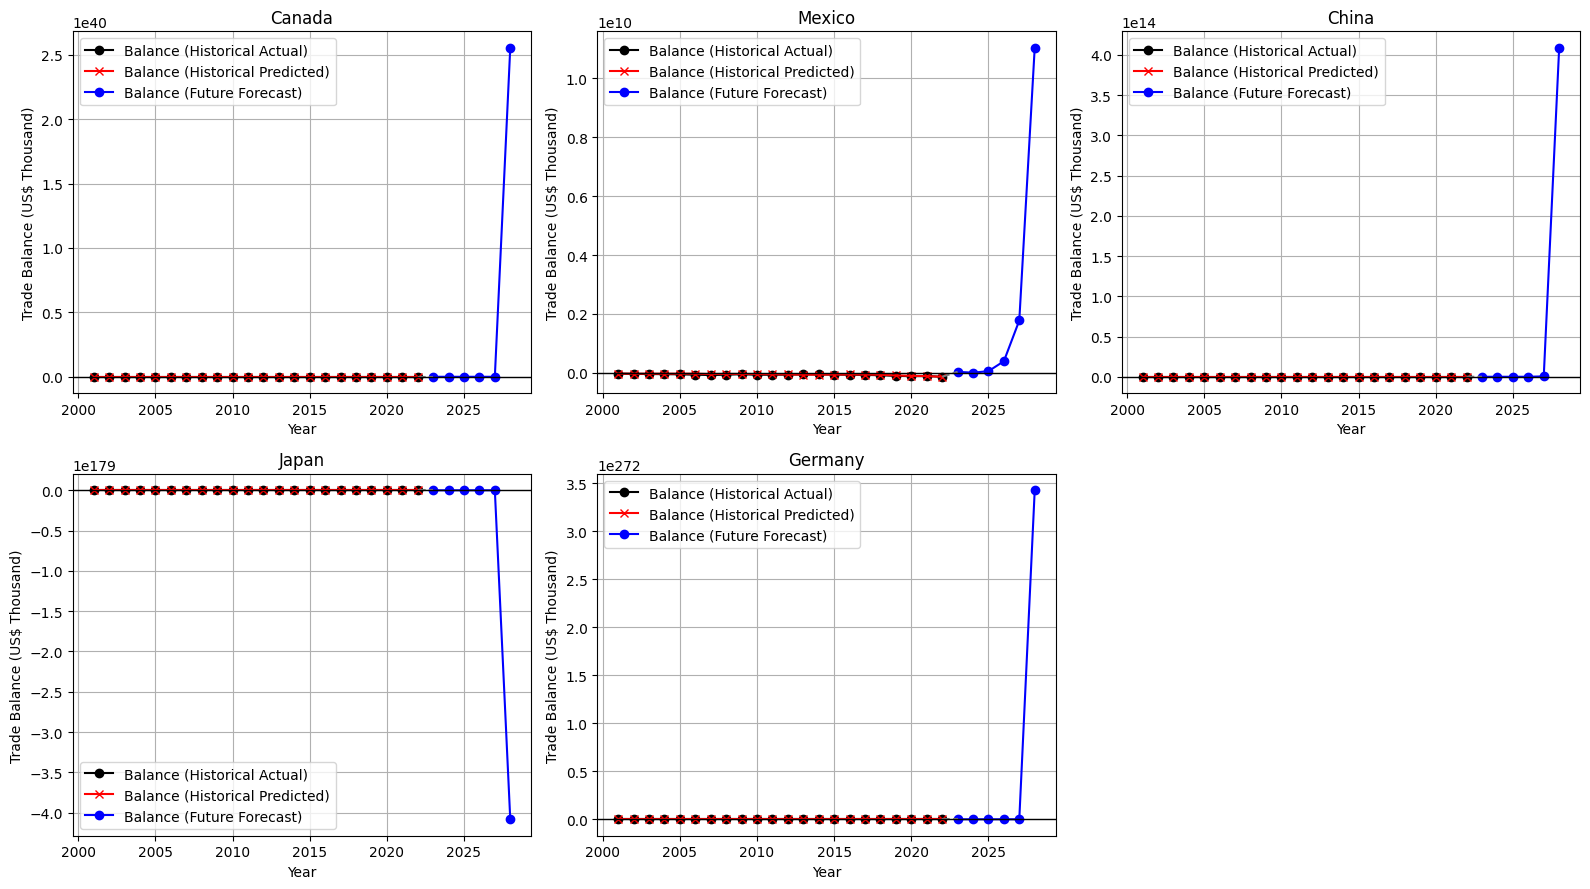

In [148]:
# Suppose you have:
#   import_results[country] = { "df_sim": df_country_sim_import, "df_forecast": df_forecast_import }
#   export_results[country] = { "df_sim": df_country_sim_export, "df_forecast": df_forecast_export }

trade_balance_results = {}

fig, axes = plt.subplots(2, 3, figsize=(16, 9))
axes = axes.flatten()

for i, country in enumerate(top_countries):
    ax = axes[i]

    if country not in import_results or country not in export_results:
        ax.set_title(f"{country} (No Data)")
        ax.axis('off')
        continue

    # 1) Combine import & export data
    df_balance = combine_import_export_forecasts(
        import_results[country],
        export_results[country]
    )

    # 2) Plot trade balance
    plot_trade_balance(ax, df_balance, country)

    # 3) Store the combined data for further analysis if needed
    trade_balance_results[country] = df_balance

# Hide extra subplot if only 5 countries
axes[-1].axis('off')
plt.tight_layout()
plt.show()


In [157]:
def plot_import_export_lines(ax, df_balance, country):
    """
    Plot historical + forecast lines for both imports and exports on the same axes.
    Each line is colored by status (historical/predicted/forecast), and
    imports vs. exports are distinguished by solid vs. dashed lines.

    df_balance : pd.DataFrame
        Contains columns like:
          "Import (Historical)", "Import (Predicted)", "Import (Forecast)",
          "Export (Historical)", "Export (Predicted)", "Export (Forecast)",
          plus "Year".
    """
    # Separate historical vs. future rows if needed
    # (Not strictly required if you want to connect them directly)
    df_hist = df_balance.dropna(subset=["Import (Historical)", "Export (Historical)"])
    df_future = df_balance.dropna(subset=["Import (Forecast)", "Export (Forecast)"])

    # 1) Plot Import Historical
    ax.plot(
        df_hist["Year"],
        df_hist["Import (Historical)"],
        color='black',
        marker='o',
        label='Import (Historical Actual)'
    )

    # 2) Plot Import Predicted (in-sample)
    ax.plot(
        df_hist["Year"],
        df_hist["Import (Predicted)"],
        color='red',
        marker='x',
        label='Import (Historical Predicted)'
    )

    # 3) Plot Import Forecast
    if len(df_future) > 0:
        ax.plot(
            df_future["Year"],
            df_future["Import (Forecast)"],
            color='blue',
            marker='o',
            label='Import (Future Forecast)'
        )
        # Optionally connect last predicted point to first forecast
        if not df_hist.empty:
            ax.plot(
                [df_hist.iloc[-1]["Year"], df_future.iloc[0]["Year"]],
                [df_hist.iloc[-1]["Import (Predicted)"], df_future.iloc[0]["Import (Forecast)"]],
                linestyle='--', color='gray'
            )

    # 4) Plot Export Historical (dashed)
    ax.plot(
        df_hist["Year"],
        df_hist["Export (Historical)"],
        color='black',
        marker='o',
        linestyle='--',
        label='Export (Historical Actual)'
    )

    # 5) Plot Export Predicted (dashed)
    ax.plot(
        df_hist["Year"],
        df_hist["Export (Predicted)"],
        color='red',
        marker='x',
        linestyle='--',
        label='Export (Historical Predicted)'
    )

    # 6) Plot Export Forecast (dashed)
    if len(df_future) > 0:
        ax.plot(
            df_future["Year"],
            df_future["Export (Forecast)"],
            color='blue',
            marker='o',
            linestyle='--',
            label='Export (Future Forecast)'
        )
        # Connect last predicted export to first forecast export
        if not df_hist.empty:
            ax.plot(
                [df_hist.iloc[-1]["Year"], df_future.iloc[0]["Year"]],
                [df_hist.iloc[-1]["Export (Predicted)"], df_future.iloc[0]["Export (Forecast)"]],
                linestyle='--', color='gray'
            )

    ax.set_title(country)
    ax.set_xlabel("Year")
    ax.set_ylabel("Value (US$ Thousand)")
    ax.grid(True)
    ax.legend()

    # Force the y-axis from 0 to 1e8
    ax.set_ylim(0, 1e9)


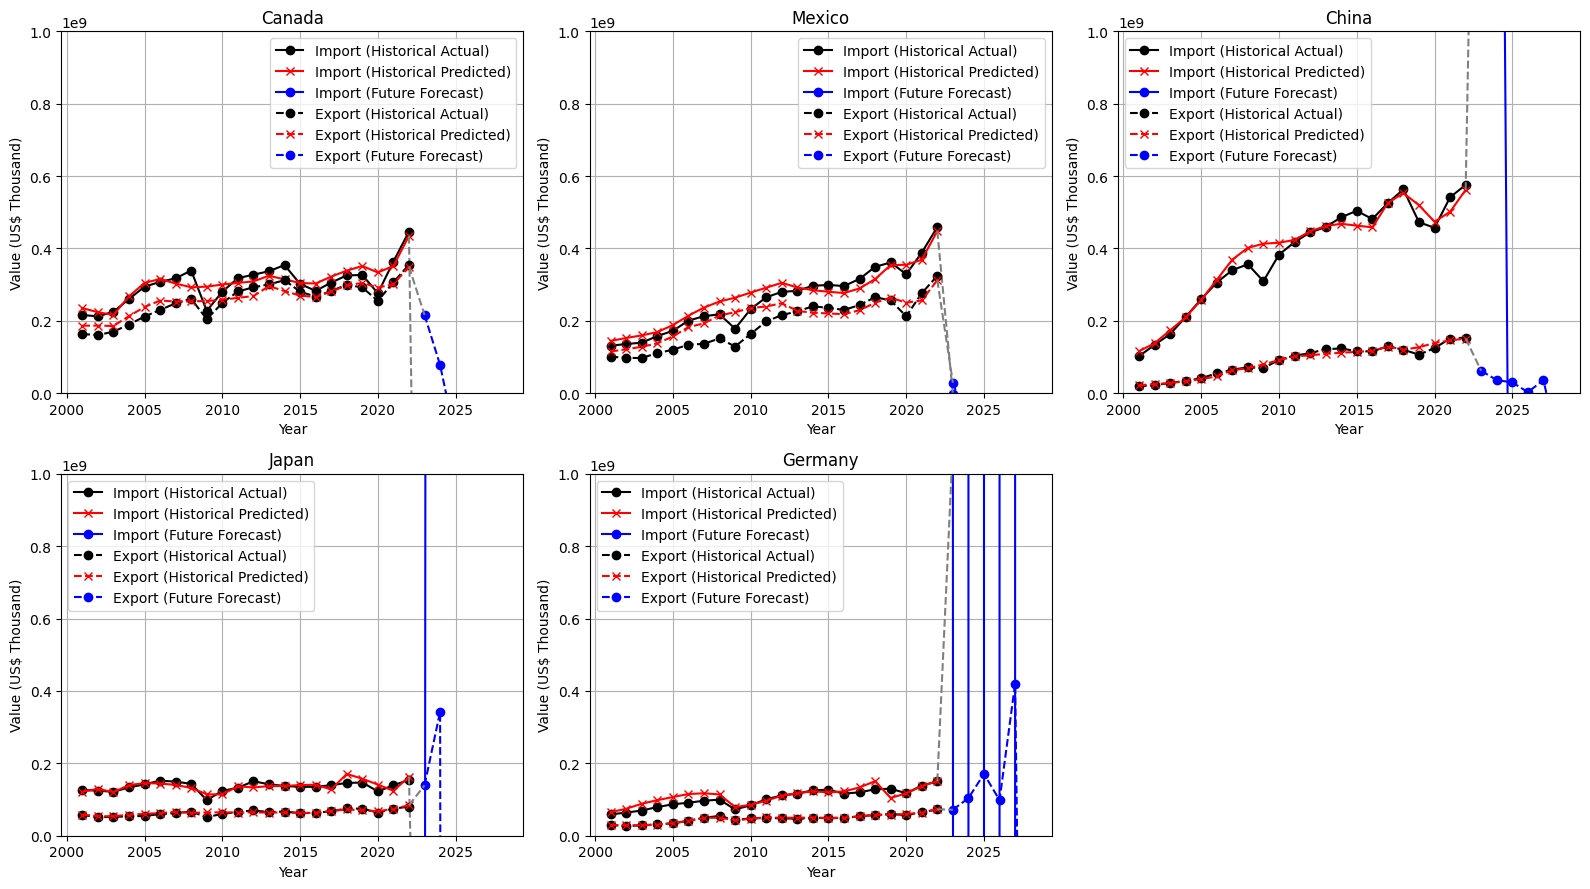

In [158]:
# Combine & Plot Imports + Exports on the same subplot
fig, axes = plt.subplots(2, 3, figsize=(16, 9))
axes = axes.flatten()

trade_balance_results = {}

for i, country in enumerate(top_countries):
    ax = axes[i]

    # Check if we have both import & export data
    if country not in import_results or country not in export_results:
        ax.set_title(f"{country} (No Data)")
        ax.axis('off')
        continue

    # 1) Merge data
    df_balance = combine_import_export_forecasts(
        import_results[country],
        export_results[country]
    )

    # 2) Plot import vs. export lines
    plot_import_export_lines(ax, df_balance, country)

    # 3) (Optional) store df_balance if you need trade balance or further analysis
    trade_balance_results[country] = df_balance

    # Now adjust the y-axis
    ax.set_ylim(0, 1e9)

# Hide extra subplot if you only have 5 countries
axes[-1].axis('off')
plt.tight_layout()
plt.show()
